# LendingClub 

https://www.lendingclub.com/info/download-data.action

This website has data from 2019 Q1 back to 2007.  The most recent data is broken up into quaters. I have imported LoanStats_2019Q1(loan2019q1) the 2019 Q1 data.  I will use the 2018-2019 data for this analysis.
Here is the older data.

The data contain complete loan data for all loans issued through the time period stated, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. 


1. Supervised Learning - to predict the good loans vs bad loans
2. Unsupervised Learning - see if there are any similar groups missed in the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

___Read in the data and clean out the unnecessary rows and combine the 
2018 and 2019 files into one dataframe.___

In [2]:
# ERROR when reading files, so I added the low_memory=False

# DtypeWarning: Columns () have mixed types.
# Specify dtype option on import or set
#low_memory=False. interactivity=interactivity,
# compiler=compiler, result=result)

loan2018q1 = pd.read_csv('LoanStats_2018Q1.csv',
                         low_memory=False, skiprows=[0])[:-2]
loan2018q2 = pd.read_csv('LoanStats_2018Q2.csv',
                         low_memory=False, skiprows=[0])[:-2]
loan2018q3 = pd.read_csv('LoanStats_2018Q3.csv',
                         low_memory=False, skiprows=[0])[:-2]
loan2018q4 = pd.read_csv('LoanStats_2018Q4.csv',
                         low_memory=False, skiprows=[0])[:-2]
loan2019q1 = pd.read_csv('LoanStats_2019Q1.csv',
                         low_memory=False, skiprows=[0])[:-2]

In [3]:
loans = [loan2018q1, loan2018q2, loan2018q3, loan2018q4, loan2019q1]
loans = pd.concat(loans)

In [4]:
loans.to_csv('loans.csv')

__LendingClub provides a dictionary with the attributes information__

In [5]:
# read in dict that explains all the features/attributes
loanAttributes = pd.read_excel('LCDataDictionary.xlsx')
# setting column width to help read data dict
pd.options.display.max_colwidth = 255
# look at top of dict
print('records: ' + str(len(loanAttributes)))

records: 153


In [6]:
loanAttributes.isnull().any()
loanAttributes.dropna(inplace=True)

In [7]:
loanAttributes.head(3)

LoanStatNew  \
0        acc_now_delinq   
1  acc_open_past_24mths   
2            addr_state   

                                                       Description  
0  The number of accounts on which the borrower is now delinquent.  
1                       Number of trades opened in past 24 months.  
2       The state provided by the borrower in the loan application

In [11]:
loanAttributes[loanAttributes['LoanStatNew'] == 'dti']
# loanAttributes.iloc[42]

LoanStatNew  \
16         dti   

                                                                                                                                                                                                 Description  
16  A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [9]:
loans.shape, loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610917 entries, 0 to 115674
Columns: 144 entries, id to settlement_term
dtypes: float64(107), object(37)
memory usage: 675.8+ MB


((610917, 144), None)

In [10]:
loans.describe()

member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count        0.0  610917.000000  610917.000000    610917.000000   
mean         NaN   16147.384178   16147.384178     16144.057272   
std          NaN   10182.091410   10182.091410     10182.443786   
min          NaN    1000.000000    1000.000000       725.000000   
25%          NaN    8300.000000    8300.000000      8300.000000   
50%          NaN   14000.000000   14000.000000     14000.000000   
75%          NaN   22000.000000   22000.000000     22000.000000   
max          NaN   40000.000000   40000.000000     40000.000000   

         installment    annual_inc  url  desc            dti    delinq_2yrs  \
count  610917.000000  6.109170e+05  0.0   0.0  609528.000000  610917.000000   
mean      469.351009  8.103302e+04  NaN   NaN      19.815929       0.228938   
std       287.677225  9.323705e+04  NaN   NaN      20.464717       0.744291   
min        29.760000  0.000000e+00  NaN   NaN       0.000000       0.000000   
25%       256.390000  4.655000e+04  NaN   NaN      11.570000       0.000000   
50%       389.190000  6.700000e+04  NaN   NaN      17.860000       0.000000   
75%       632.980000  9.700000e+04  NaN   NaN      25.180000       0.000000   
max      1676.230000  9.930475e+06  NaN   NaN     999.000000      58.000000   

            ...         deferral_term  hardship_amount  hardship_length  \
count       ...                 590.0       590.000000            590.0   
mean        ...                   3.0       200.987254              3.0   
std         ...                   0.0       145.553591              0.0   
min         ...                   3.0         5.950000              3.0   
25%         ...                   3.0        90.240000              3.0   
50%         ...                   3.0       170.260000              3.0   
75%         ...                   3.0       272.995000              3.0   
max         ...                   3.0       876.460000              3.0   

       hardship_dpd  orig_projected_additional_accrued_interest  \
count    590.000000                                  487.000000   
mean      13.581356                                  611.095626   
std        8.532132                                  430.427422   
min        0.000000                                   31.470000   
25%        7.000000                                  277.935000   
50%       14.000000                                  523.170000   
75%       21.000000                                  824.880000   
max       30.000000                                 2535.660000   

       hardship_payoff_balance_amount  hardship_last_payment_amount  \
count                      590.000000                    590.000000   
mean                     15785.105085                    220.900542   
std                       9108.061726                    204.608260   
min                        424.110000                      0.070000   
25%                       8202.280000                     63.075000   
50%                      13891.090000                    165.265000   
75%                      22414.395000                    334.452500   
max                      40149.350000                   1159.620000   

       settlement_amount  settlement_percentage  settlement_term  
count         866.000000             866.000000       866.000000  
mean         7098.285727              52.688048        18.124711  
std          4924.082691               8.823822         6.660081  
min           413.930000              29.920000         1.000000  
25%          3363.750000              45.000000        16.000000  
50%          5668.565000              50.000000        18.000000  
75%          9795.750000              60.000000        24.000000  
max         28503.000000              80.000000        24.000000  

[8 rows x 107 columns]

___There are 610917 rows and 144 columns with data types of floats and objects.  Let's look to see what the unique values are in the dataframe.___

In [12]:
# all the unique values of each attribute
for var in loans:
    print(var, '\n', loans[var].unique(), '\n')

id 
 [nan] 

member_id 
 [nan] 

loan_amnt 
 [25000. 11200. 10000. ...  1425.  2025. 35125.] 

funded_amnt 
 [25000. 11200. 10000. ...  1425.  2025. 35125.] 

funded_amnt_inv 
 [25000.         11200.         10000.         ...  4938.25625391
  2025.         35125.        ] 

term 
 [' 60 months' ' 36 months'] 

int_rate 
 [' 21.85%' ' 30.79%' ' 12.61%' '  6.07%' ' 10.41%' '  7.34%' ' 17.47%'
 '  9.92%' ' 20.39%' ' 13.58%' ' 11.98%' '  7.96%' ' 18.45%' '  9.43%'
 '  6.71%' '  5.31%' ' 15.04%' ' 10.90%' ' 16.01%' ' 14.07%' ' 24.84%'
 ' 19.42%' ' 23.87%' ' 26.77%' ' 25.81%' ' 30.65%' ' 28.72%' ' 30.17%'
 ' 22.90%' ' 29.69%' ' 30.75%' ' 11.99%' ' 20.00%' ' 30.94%' '  6.00%'
 ' 15.05%' ' 17.09%' '  6.08%' '  7.35%' ' 10.91%' ' 12.62%' '  9.93%'
 ' 24.85%' ' 18.06%' ' 23.88%' ' 14.08%' ' 10.42%' '  9.44%' '  6.72%'
 ' 19.03%' ' 16.02%' ' 21.45%' ' 13.59%' '  5.32%' '  7.97%' ' 25.82%'
 ' 26.30%' ' 22.91%' ' 30.84%' ' 30.99%' ' 30.89%' ' 13.06%' ' 14.03%'
 ' 16.46%' '  8.08%' '  6.83%' ' 14.5

open_acc 
 [  7.   8.  17.  11.   6.  14.  19.   5.   9.  16.  12.  23.  20.  10.
  22.  13.  21.  15.   3.   4.  18.   1.  27.  28.  24.   2.  26.  25.
  36.  41.  30.  42.  29.  38.  47.  33.  32.  31.  34.  39.  37.  49.
  58.  46.  40.  44.   0.  35.  45.  57.  59.  69.  61.  52.  55.  43.
  48.  50.  60.  65.  51.  54.  56. 101.  66.  53.  62.  63.  86.  72.
  78.  82.  68.  64.  70.  94.] 

pub_rec 
 [ 0.  1.  7.  2.  4.  3. 10.  6.  5. 13.  9.  8. 24. 52. 19. 15.] 

revol_bal 
 [ 8657.  1526. 10710. ... 92648. 58392. 59529.] 

revol_util 
 ['98.4%' '24.6%' '37.7%' ... '131.3%' '107.8%' '107.3%'] 

total_acc 
 [ 16.  14.  23.  12.  30.   9.  18.  53.  24.   8.  25.  27.  39.  22.
  33.  15.  38.  26.  37.  21.  29.  13.  32.  36.  17.  20.  10.  31.
  35.   3.  50.  11.  44.  34.   6.  57.  47.  19.  28.  43.  42.   4.
  45.   7.  51.  41.  64.  55.  62.   5.  52.  49.   2.  61.  40.  83.
  74.  54.  77.  65.  46.  56.  59.  66.  63.  48.  60.  73.  85.  58.
  70.  76.  68.  86. 

bc_open_to_buy 
 [6.3000e+01 6.3200e+02 4.1930e+03 ... 4.7646e+04 6.9994e+04 4.1467e+04] 

bc_util 
 [ 98.1  66.7  66.5 ... 122.5 126.5 149.7] 

chargeoff_within_12_mths 
 [0. 1. 3. 2. 7. 4. 9. 6. 5.] 

delinq_amnt 
 [0.0000e+00 2.3930e+03 6.9700e+02 4.0300e+02 3.2520e+03 1.9090e+03
 1.4430e+03 1.6000e+02 7.5300e+02 2.4000e+01 1.3520e+03 6.5400e+02
 9.9180e+03 9.9730e+03 2.3600e+02 4.3500e+02 6.4300e+03 9.8000e+01
 6.2750e+03 1.7560e+03 1.8270e+03 3.2850e+03 3.0430e+03 1.0486e+04
 3.5480e+03 1.5700e+02 2.3840e+03 9.1700e+02 1.4530e+03 1.1150e+03
 1.1500e+02 1.2870e+03 7.0000e+01 2.6000e+01 2.2140e+03 9.3490e+03
 9.3000e+02 5.2000e+01 1.2360e+03 5.5468e+04 1.7500e+03 2.8820e+03
 6.5000e+04 6.4000e+01 1.0300e+02 2.3820e+03 8.7090e+03 8.4000e+01
 5.0000e+00 4.6950e+03 1.9590e+03 2.4220e+03 1.3000e+02 6.3500e+03
 8.8080e+03 2.3040e+03 6.2000e+01 2.5970e+03 2.5110e+03 3.3356e+04
 1.6860e+03 1.8436e+04 3.3690e+03 2.1920e+03 9.4300e+02 1.5540e+03
 4.4200e+03 1.1564e+04 4.0900e+02 2.3300e+02 4

num_sats 
 [  7.   8.  17.  11.   6.  14.  19.   5.   9.  16.  12.  23.  20.  10.
  22.  13.  21.  15.   3.   4.  18.   1.  27.  28.  24.   2.  26.  25.
  36.  41.  30.  42.  29.  38.  47.  33.  32.  31.  34.  39.  37.  49.
  58.  46.  40.  44.   0.  35.  45.  57.  59.  69.  61.  52.  55.  43.
  48.  50.  60.  65.  51.  54.  56. 101.  66.  53.  62.  63.  82.  72.
  78.  67.  64.  70.  94.  68.] 

num_tl_120dpd_2m 
 [ 0. nan] 

num_tl_30dpd 
 [0. 1.] 

num_tl_90g_dpd_24m 
 [ 1.  0.  3.  2.  7.  4.  8. 11.  5.  6. 10. 19.  9. 13. 12. 14. 15. 17.
 23. 16. 21. 18. 58. 35. 20.] 

num_tl_op_past_12m 
 [ 0.  2.  6.  1.  5.  3.  7.  4.  8. 12.  9. 10. 11. 13. 16. 15. 14. 17.
 20. 19. 18. 22. 21. 23. 26. 24.] 

pct_tl_nvr_dlq 
 [ 75.   71.4  91.3  93.8 100.   96.7  83.3  98.   77.8  85.7  96.   95.7
  96.3  76.9  90.6  94.1  93.3  91.9  72.2  89.7  92.3  92.6  95.8  90.
  95.2  82.6  97.1  96.2  90.9  81.3  70.   86.4  95.5  93.1  97.3  47.8
  88.9  96.5  96.6  96.8  97.8  78.9  43.8  87.   94.

sec_app_open_acc 
 [nan 14.  8. 10. 17.  6.  3.  9. 13.  7.  4. 27. 20. 12.  5. 18. 11. 19.
 30. 16. 38.  1. 23. 29.  2. 28. 15. 39. 40. 25. 24. 21. 22. 26. 32. 42.
  0. 31. 33. 34. 41. 49. 35. 44. 36. 48. 37. 53. 45. 47. 43. 61. 66. 56.
 52. 46. 58. 50. 51. 59. 55. 60. 57. 67. 54. 75.] 

sec_app_revol_util 
 [  nan  80.   44.1 ... 139.  125.4 106.6] 

sec_app_open_act_il 
 [nan 11.  1.  0.  2.  6.  3.  9.  4. 20.  5.  7.  8. 10. 15. 12. 19. 13.
 14. 18. 21. 23. 17. 16. 22. 28. 30. 26. 27. 32. 25. 24. 34. 35. 33. 29.
 39. 43. 31. 36.] 

sec_app_num_rev_accts 
 [ nan   8.   6.  16.  11.  20.   5.   4.  15.   9.  12.  17.  10.  21.
  13.   3.  18.  31.   7.  44.   2.  40.  14.   1.  56.  29.  27.  33.
  22.  26.  24.  19.  54.  39.  23.   0.  34.  25.  30.  28.  35.  38.
  50.  42.  36.  32.  45.  37.  41.  52.  59.  43.  48.  47.  46.  53.
  57.  51.  55.  77.  85.  62.  64.  61.  49.  71.  75.  68.  69.  67.
  70.  60.  79.  63.  58. 106.  65.  66.  95.  72.  74.  73. 110.] 

sec_app_c

## Data Cleaning

__All features which are not relevant for the loan approval (any which occurs after the loan is approved) and all null features with over 50% missing will be removed. Any feature that has 50% of less missing values, the mean will be used to fill in those values.__

In [13]:
loans['revol_util'] = loans['revol_util'].map(lambda x: str(x).rstrip('%'))

_Drop all features with missing values greater than 50%_

In [14]:
percentNull = 100 * loans.isnull().sum() / len(loans)
missing = pd.concat([loans.isnull().sum(), percentNull], axis=1)

In [15]:
loans.shape, missing.shape

((610917, 144), (144, 2))

In [16]:
missing = missing.rename(columns={
    0: '50%_Missing',
    1: 'Percent_Missing'})
missing = missing[missing['Percent_Missing'] > 50]
missing.sort_values(by='Percent_Missing')

50%_Missing  Percent_Missing
mths_since_last_delinq                           342451        56.055242
mths_since_recent_revol_delinq                   435331        71.258616
mths_since_last_major_derog                      471086        77.111293
mths_since_recent_bc_dlq                         490209        80.241506
sec_app_chargeoff_within_12_mths                 525251        85.977473
sec_app_num_rev_accts                            525251        85.977473
sec_app_open_act_il                              525251        85.977473
sec_app_open_acc                                 525251        85.977473
sec_app_mort_acc                                 525251        85.977473
sec_app_inq_last_6mths                           525251        85.977473
sec_app_earliest_cr_line                         525251        85.977473
revol_bal_joint                                  525251        85.977473
sec_app_collections_12_mths_ex_med               525251        85.977473
dti_joint                                        525251        85.977473
annual_inc_joint                                 525251        85.977473
sec_app_revol_util                               526678        86.211056
verification_status_joint                        532282        87.128366
mths_since_last_record                           534510        87.493064
sec_app_mths_since_last_major_derog              583639        95.534909
settlement_status                                610051        99.858246
settlement_date                                  610051        99.858246
settlement_amount                                610051        99.858246
debt_settlement_flag_date                        610051        99.858246
settlement_term                                  610051        99.858246
settlement_percentage                            610051        99.858246
hardship_reason                                  610327        99.903424
hardship_last_payment_amount                     610327        99.903424
hardship_payoff_balance_amount                   610327        99.903424
hardship_type                                    610327        99.903424
hardship_dpd                                     610327        99.903424
hardship_length                                  610327        99.903424
hardship_loan_status                             610327        99.903424
hardship_end_date                                610327        99.903424
hardship_start_date                              610327        99.903424
hardship_amount                                  610327        99.903424
deferral_term                                    610327        99.903424
hardship_status                                  610327        99.903424
payment_plan_start_date                          610327        99.903424
orig_projected_additional_accrued_interest       610430        99.920284
desc                                             610917       100.000000
url                                              610917       100.000000
member_id                                        610917       100.000000
id                                               610917       100.000000

In [17]:
for val in missing.index:
    print(val)
    loans.drop([val], inplace=True, axis=1)

id
member_id
url
desc
mths_since_last_delinq
mths_since_last_record
mths_since_last_major_derog
annual_inc_joint
dti_joint
verification_status_joint
mths_since_recent_bc_dlq
mths_since_recent_revol_delinq
revol_bal_joint
sec_app_earliest_cr_line
sec_app_inq_last_6mths
sec_app_mort_acc
sec_app_open_acc
sec_app_revol_util
sec_app_open_act_il
sec_app_num_rev_accts
sec_app_chargeoff_within_12_mths
sec_app_collections_12_mths_ex_med
sec_app_mths_since_last_major_derog
hardship_type
hardship_reason
hardship_status
deferral_term
hardship_amount
hardship_start_date
hardship_end_date
payment_plan_start_date
hardship_length
hardship_dpd
hardship_loan_status
orig_projected_additional_accrued_interest
hardship_payoff_balance_amount
hardship_last_payment_amount
debt_settlement_flag_date
settlement_status
settlement_date
settlement_amount
settlement_percentage
settlement_term


_Handling the dtypes that are objects_

In [18]:
loans['emp_length'].fillna('No Info', inplace=True)
loans['emp_title'].fillna('No Info', inplace=True)

_For the missing values that are left, the mean will be used._

In [19]:
nulls = 100 * loans.isnull().sum() / len(loans)
missing2 = pd.concat([loans.isnull().sum(), nulls], axis=1)


missing2 = missing2.rename(columns={
    0: '10%_Missing',
    1: 'Percent_Missing'})
missing2 = missing2[missing2['Percent_Missing'] > 0]
missing2

10%_Missing  Percent_Missing
dti                           1389         0.227363
last_pymnt_d                   871         0.142573
next_pymnt_d                 79117        12.950532
last_credit_pull_d               7         0.001146
mths_since_rcnt_il           21927         3.589195
il_util                      98143        16.064866
all_util                       153         0.025044
avg_cur_bal                     47         0.007693
bc_open_to_buy                7911         1.294939
bc_util                       8181         1.339134
mo_sin_old_il_acct           21927         3.589195
mths_since_recent_bc          7456         1.220460
mths_since_recent_inq        75662        12.384988
num_tl_120dpd_2m             15550         2.545354
pct_tl_nvr_dlq                   2         0.000327
percent_bc_gt_75              7925         1.297230

In [20]:
missing2Num = [var for var in missing2.index if loans[var].dtype != 'O']
missing2Cat = [var for var in missing2.index if loans[var].dtype == 'O']

In [21]:
# replace with mean value for numerical values
for var in missing2Num:
    loans[var].fillna(loans[var].mean(), inplace=True)

In [22]:
percentNull3 = 100 * loans.isnull().sum() / len(loans)
missing3 = pd.concat([loans.isnull().sum(), percentNull3], axis=1)

missing3 = missing3.rename(columns={
    0: '50%_Missing',
    1: 'Percent_Missing'})
missing3 = missing3[missing3['Percent_Missing'] > 0]
missing3.sort_values(by='Percent_Missing')

50%_Missing  Percent_Missing
last_credit_pull_d            7         0.001146
last_pymnt_d                871         0.142573
next_pymnt_d              79117        12.950532

__For the remaining NAN values(, the columns will be dropped as they are not relavent for this model__

In [23]:
missing3

50%_Missing  Percent_Missing
last_pymnt_d                871         0.142573
next_pymnt_d              79117        12.950532
last_credit_pull_d            7         0.001146

In [24]:
loanAttributes[loanAttributes['LoanStatNew'] == 'last_credit_pull_d']
#loanAttributes[loanAttributes['LoanStatNew'] == 'last_pymnt_d']
#loanAttributes[loanAttributes['LoanStatNew'] == 'next_pymnt_d']

LoanStatNew                                           Description
36  last_credit_pull_d  The most recent month LC pulled credit for this loan

In [25]:
for val in missing3.index:
    print(val)
    loans.drop([val], inplace=True, axis=1)

last_pymnt_d
next_pymnt_d
last_credit_pull_d


In [26]:
loans.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
                             ..
mo_sin_o

In [27]:
loans.shape

(610917, 98)

___Now that all the null values are removed, I can remove the last of the columns that are not needed.  They are the features that occur after the loan has already been approved.  Again we are trying to predict the number of good loans.___

In [28]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'in

In [29]:
loanAttributes[loanAttributes['LoanStatNew'] == 'total_bc_limit']

LoanStatNew                              Description
102  total_bc_limit  Total bankcard high credit/credit limit

In [30]:
loans.drop(['funded_amnt',
            'funded_amnt_inv',
            'int_rate',
            'total_pymnt',
            'total_pymnt_inv',
            'total_rec_prncp',
            'total_rec_int',
            'total_rec_late_fee',
            'recoveries',
            'collection_recovery_fee',
            'last_pymnt_amnt',
            'tot_coll_amt',
            'tot_cur_bal',
            'total_bal_il',
            'hardship_flag',
            'debt_settlement_flag',
            'out_prncp_inv',
            'num_tl_120dpd_2m',
            'acc_now_delinq',
            'num_tl_120dpd_2m',
            'num_tl_30dpd',
            'policy_code'
            ], inplace=True, axis=1)

In [31]:
loans.isnull().sum()

loan_amnt                     0
term                          0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
collections_12_mths_ex_med    0
application_type              0
                             ..
bc_util 

___The features above are features that come after the loan has been approved, therefore they will be dropped.___

In [32]:
loans.columns

Index(['loan_amnt', 'term', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp',
       'collections_12_mths_ex_med', 'application_type', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

In [33]:
loans.shape

(610917, 77)

In [34]:
loans.to_csv('cleanedLendingClub.csv')

----------

___We have to deal with the features that have dates.  A loan can't be predicted from the same day.  So we have to subtract at least 30 days from the current date to underwrite the loan.___

In [35]:
# the issue data will be the date that is
# used to forcast with the time series
loans.issue_d.value_counts()

May-2018    46311
Oct-2018    46305
Aug-2018    46079
Jan-2019    43584
Jul-2018    43089
Apr-2018    42928
Nov-2018    41973
Jun-2018    41533
Dec-2018    40134
Sep-2018    39026
Mar-2018    38771
Jan-2018    36347
Mar-2019    36106
Feb-2019    35985
Feb-2018    32746
Name: issue_d, dtype: int64

In [36]:
# convert the data for the feature 'issued_d'
loans['issue_d_xx'] = pd.to_datetime(loans['issue_d'])

maxDate = max(loans.issue_d_xx)
loans['issue_d_diff'] = (maxDate - loans.issue_d_xx)
loans['issue_d_diff'] = loans['issue_d_diff'].dt.days
loans['months_since_issue_d'] = loans['issue_d_diff']/30.5
loans = loans.drop(['issue_d_xx', 'issue_d_diff'], axis=1)

In [37]:
'''# convert the date for the feature 'last_credit_pull_d'
df['last_credit_pull_d_xx'] = pd.to_datetime(df['last_credit_pull_d'])

maxDate = max(df.last_credit_pull_d_xx)
df['last_credit_pull_d_diff'] = (maxDate - df.last_credit_pull_d_xx)
df['last_credit_pull_d_diff'] = df['last_credit_pull_d_diff'].dt.days
df['months_since_last_credit_pull_d'] = df['last_credit_pull_d_diff']/30.5
df = df.drop(['last_credit_pull_d_xx', 'last_credit_pull_d_diff'], axis=1)'''

"# convert the date for the feature 'last_credit_pull_d'\ndf['last_credit_pull_d_xx'] = pd.to_datetime(df['last_credit_pull_d'])\n\nmaxDate = max(df.last_credit_pull_d_xx)\ndf['last_credit_pull_d_diff'] = (maxDate - df.last_credit_pull_d_xx)\ndf['last_credit_pull_d_diff'] = df['last_credit_pull_d_diff'].dt.days\ndf['months_since_last_credit_pull_d'] = df['last_credit_pull_d_diff']/30.5\ndf = df.drop(['last_credit_pull_d_xx', 'last_credit_pull_d_diff'], axis=1)"

In [38]:
loans.shape, loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610917 entries, 0 to 115674
Data columns (total 78 columns):
loan_amnt                     610917 non-null float64
term                          610917 non-null object
installment                   610917 non-null float64
grade                         610917 non-null object
sub_grade                     610917 non-null object
emp_title                     610917 non-null object
emp_length                    610917 non-null object
home_ownership                610917 non-null object
annual_inc                    610917 non-null float64
verification_status           610917 non-null object
issue_d                       610917 non-null object
loan_status                   610917 non-null object
pymnt_plan                    610917 non-null object
purpose                       610917 non-null object
title                         610917 non-null object
zip_code                      610917 non-null object
addr_state                    610917 n

((610917, 78), None)

---------

__Dropping all values that don't apply to loan approval for the loan status___

In [39]:
loans.loan_status.value_counts()

Current               518013
Fully Paid             65793
Charged Off            13324
Late (31-120 days)      8798
In Grace Period         2865
Late (16-30 days)       2116
Default                    8
Name: loan_status, dtype: int64

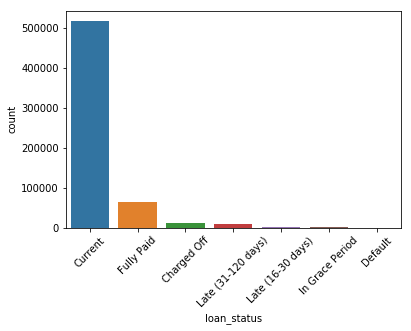

In [40]:
loan_stat = loans["loan_status"]
sns.countplot(loan_stat)
stat_temp = loans.loan_status.value_counts().sum()
plt.xticks(rotation=45)

In [41]:
loans = loans[loans['loan_status'] != 'Current']
loans = loans[loans['loan_status'] != 'In Grace Period']
loans = loans[loans['loan_status'] != 'Late (16-30 days)']

In [42]:
loans.loan_status.value_counts()

Fully Paid            65793
Charged Off           13324
Late (31-120 days)     8798
Default                   8
Name: loan_status, dtype: int64

In [43]:
loans['good_loan_status'] = loans['loan_status'] == 'Fully Paid'
ls_map = {True: 1, False: 0}
loans['good_loan_status'] = loans['good_loan_status'].map(ls_map)

___The baseline accuracy score 77.37% for good loans versus bad loans.___

1    65793
0    22130
Name: good_loan_status, dtype: int64 
baseline: 0.7737 


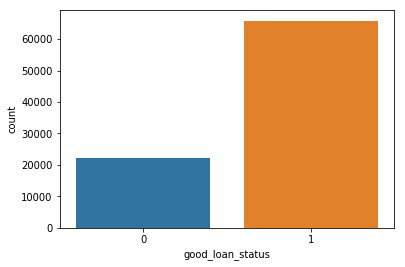

In [44]:
# baseline (56725/(56725+16593) - if predict all ones
good = loans['good_loan_status']
sns.countplot(good)
good_temp = loans['good_loan_status'].value_counts()
print(good_temp, '\nbaseline: {:.4f} '.format(56725/(56725+16593)))

_Categorical and Numerical values_

In [45]:
# numerical and categorical variables
loans_numerical = loans.select_dtypes(include=['float64', 'int64'])
loans_categorical = loans.select_dtypes(include=['object'])

In [46]:
# for cats in loans_categorical:
#print('\n\n' + cats+'\n****************')
# print(loans[cats].value_counts())

In [47]:
# for nums in loans_numerical:
#print('\n\n' + nums+'\n****************')
# print(loans[nums].value_counts())

# Data Visulizations

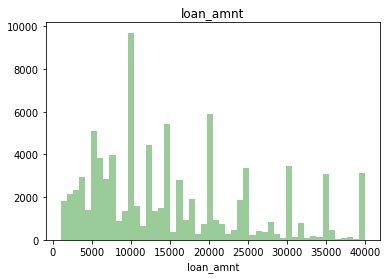

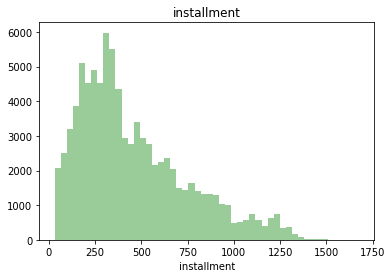

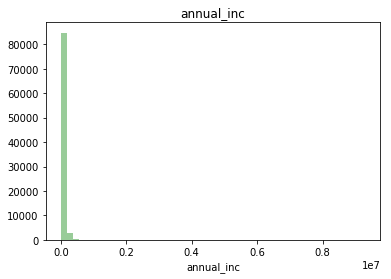

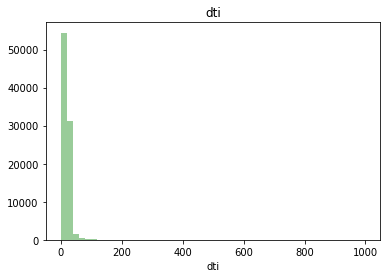

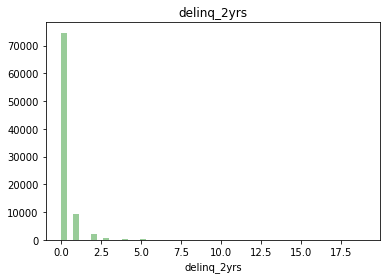

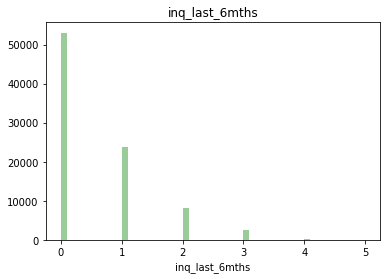

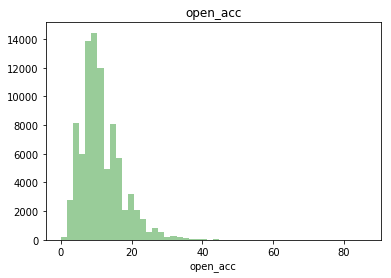

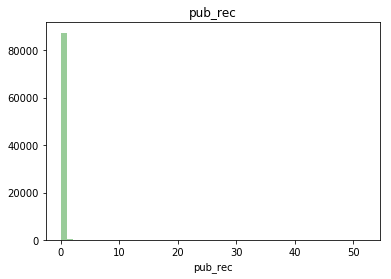

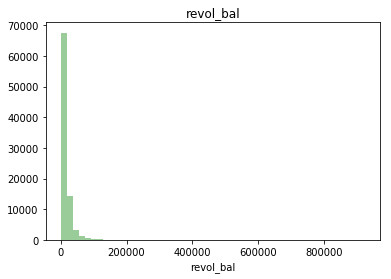

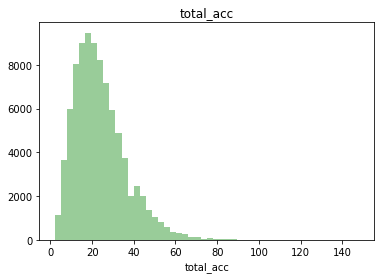

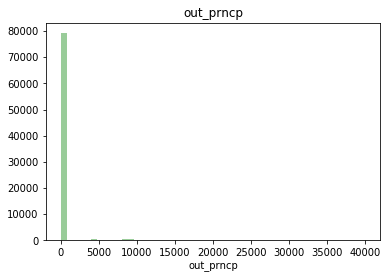

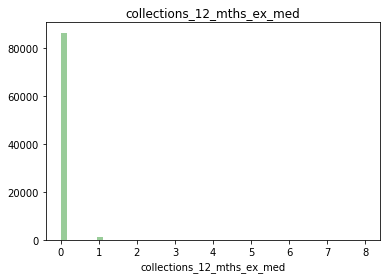

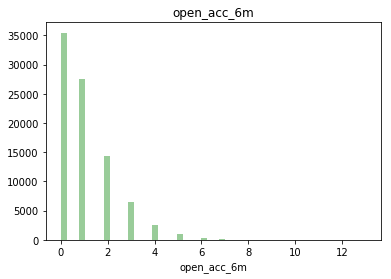

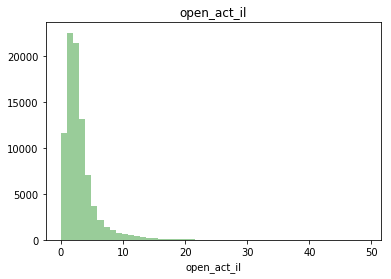

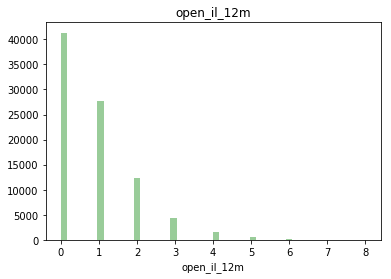

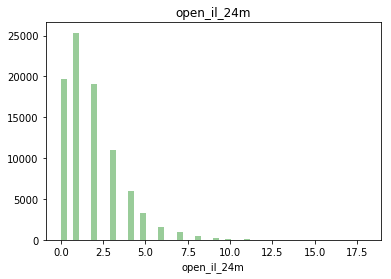

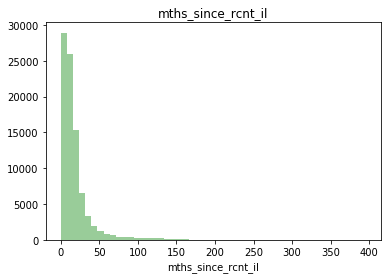

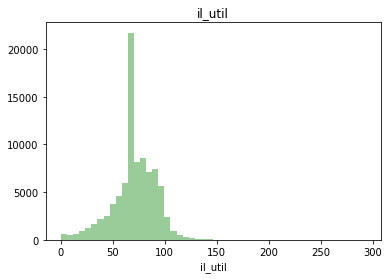

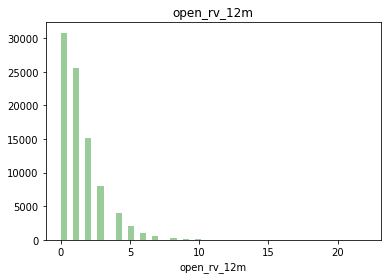

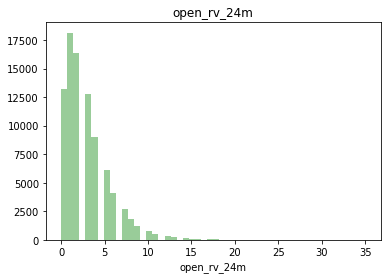

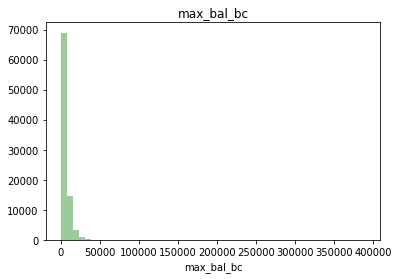

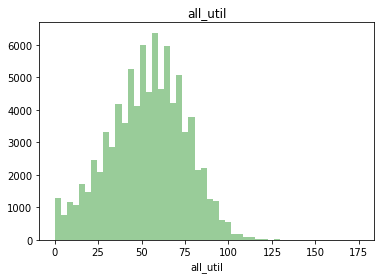

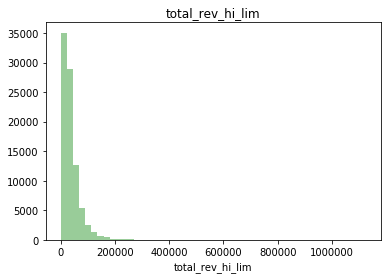

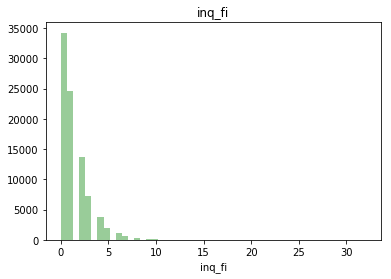

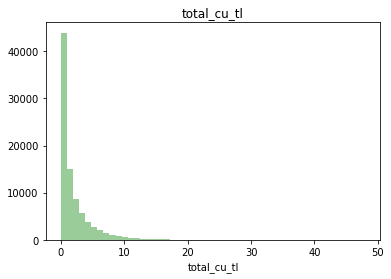

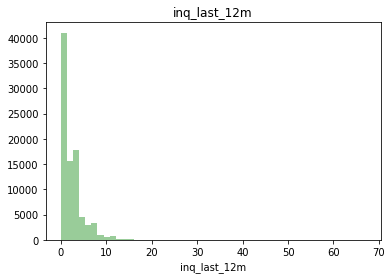

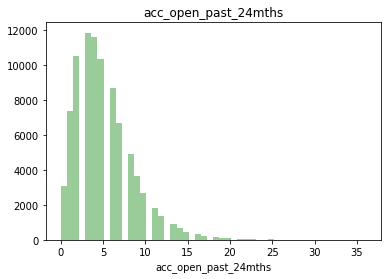

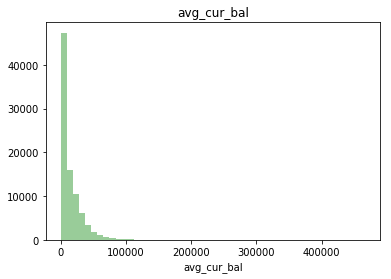

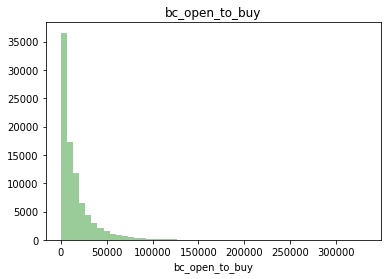

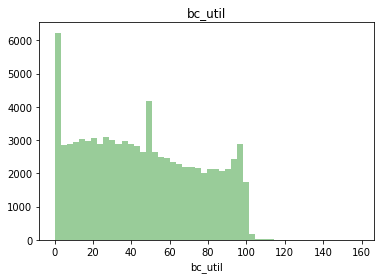

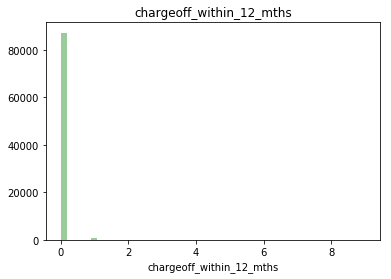

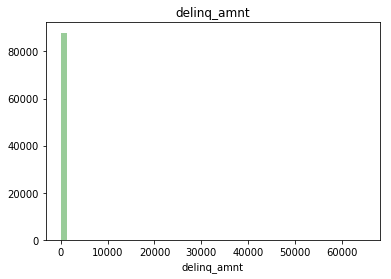

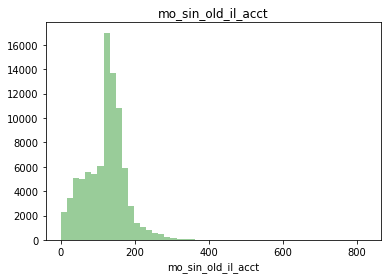

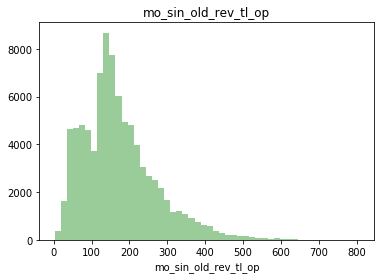

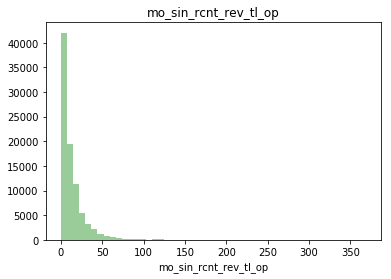

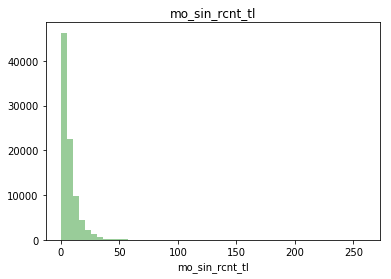

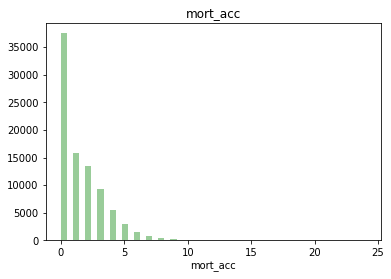

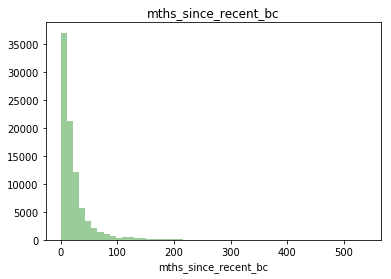

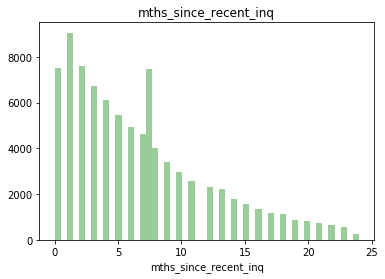

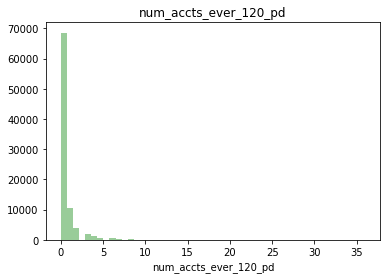

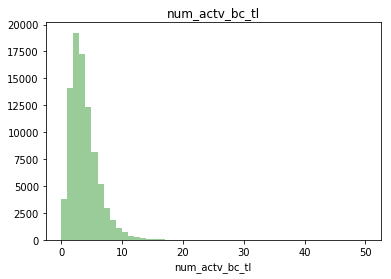

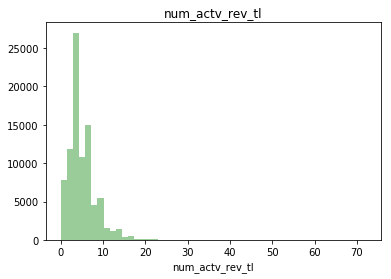

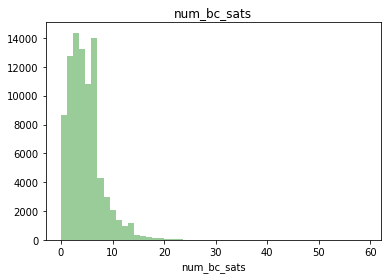

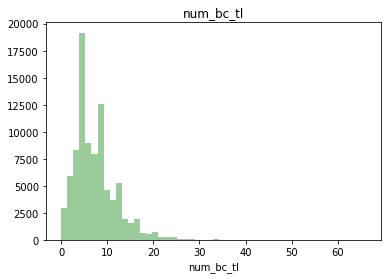

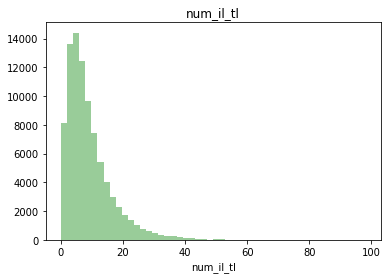

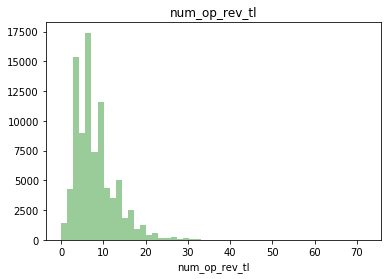

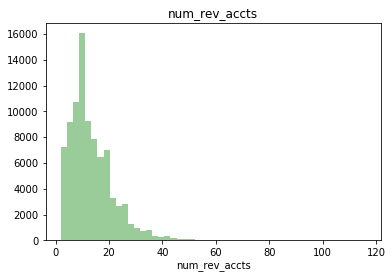

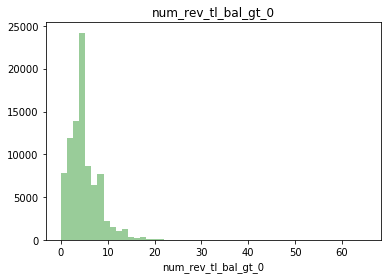

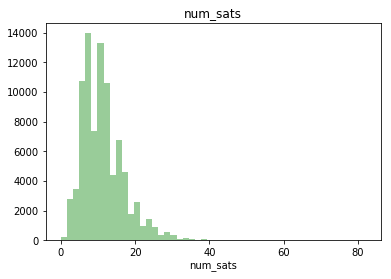

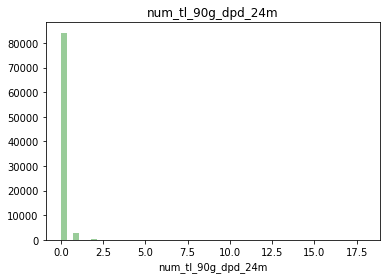

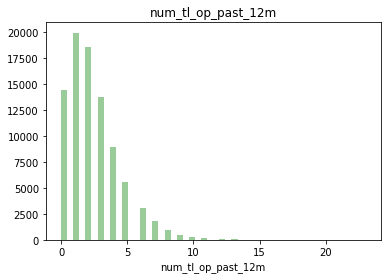

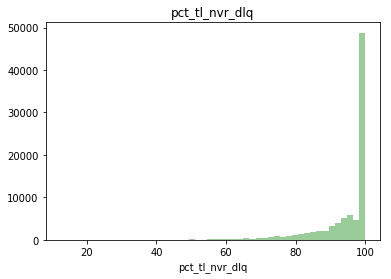

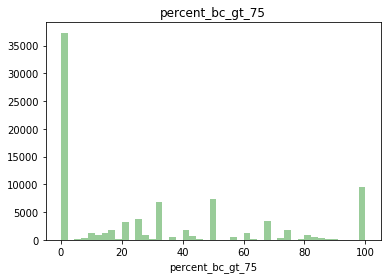

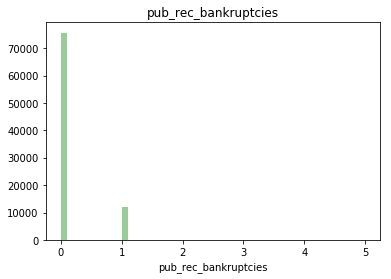

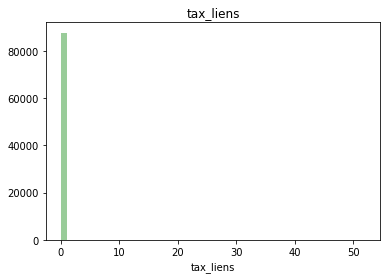

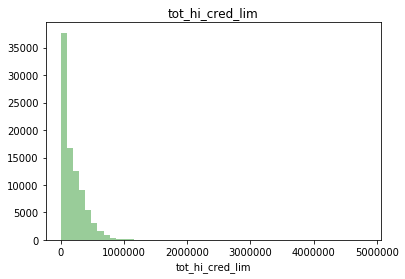

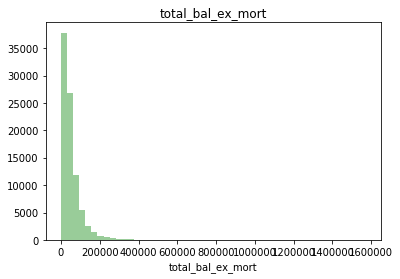

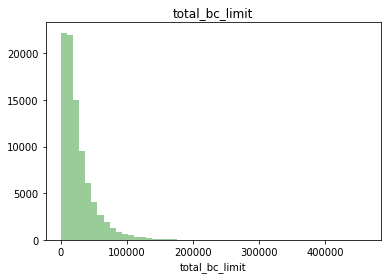

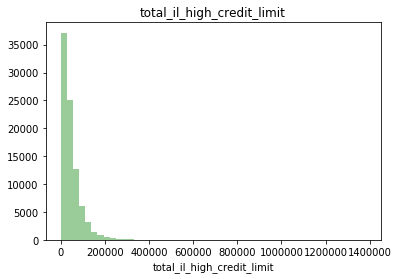

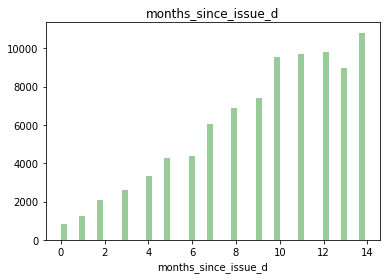

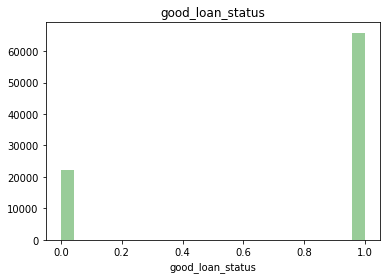

In [48]:
for var in loans_numerical:
    sns.distplot(loans[var], kde=False, color='g')
    plt.title(var)
    plt.show()

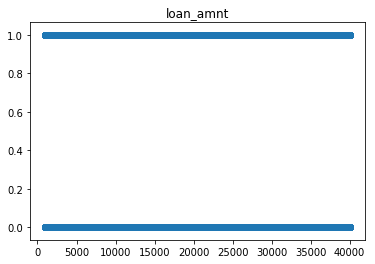

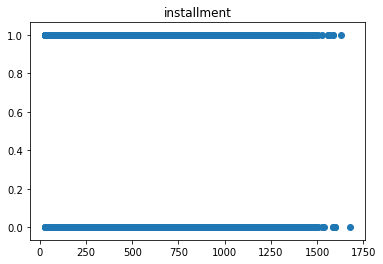

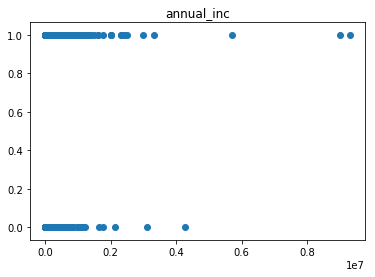

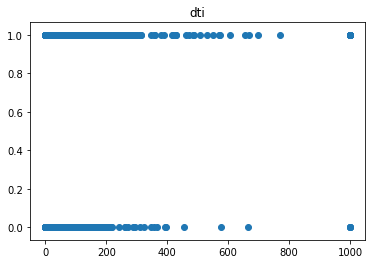

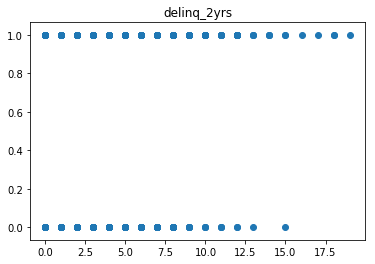

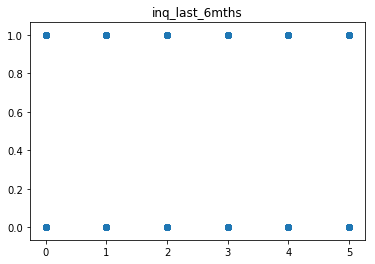

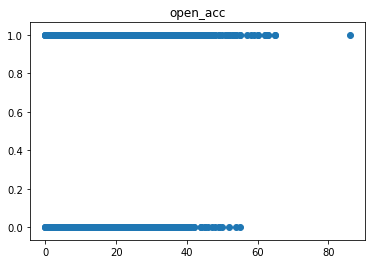

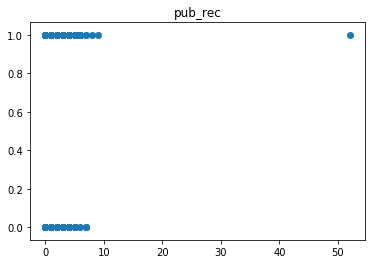

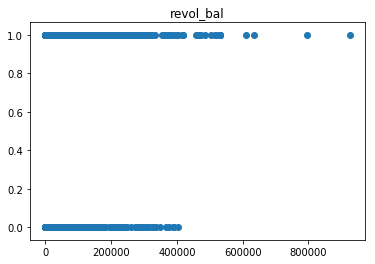

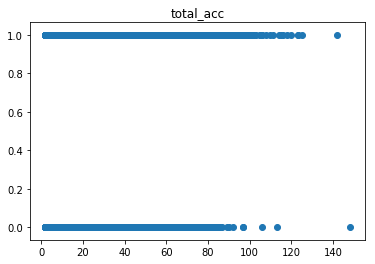

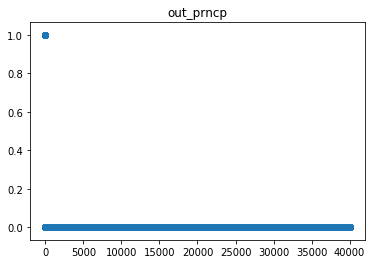

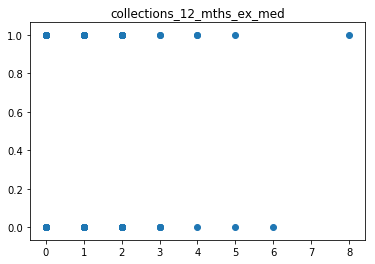

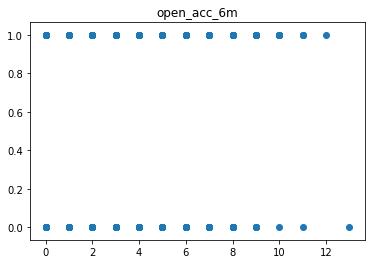

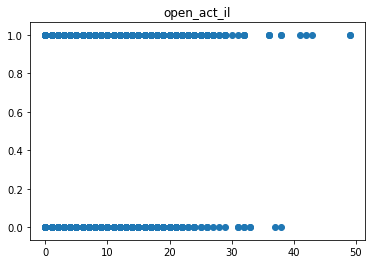

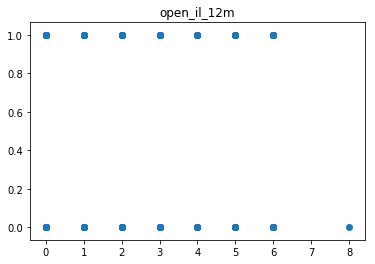

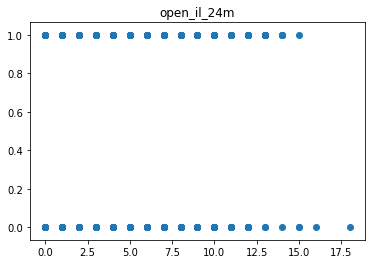

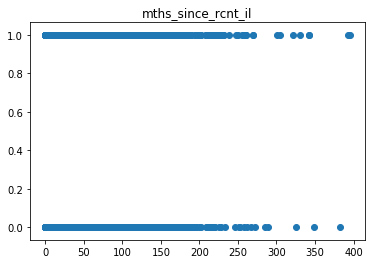

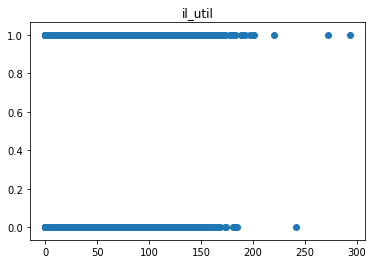

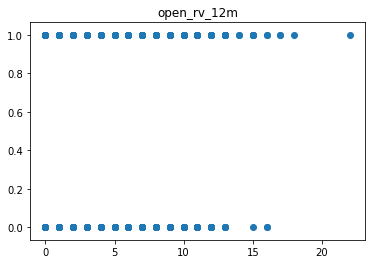

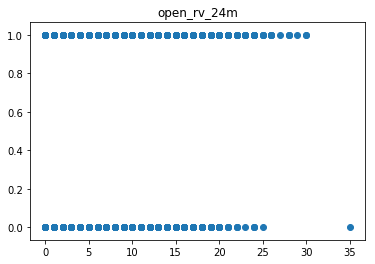

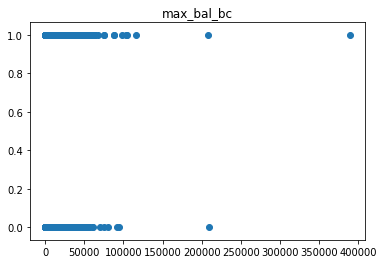

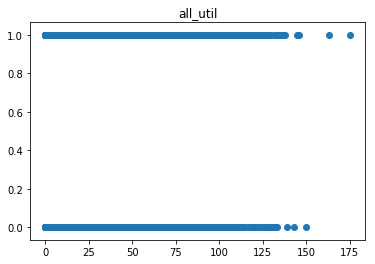

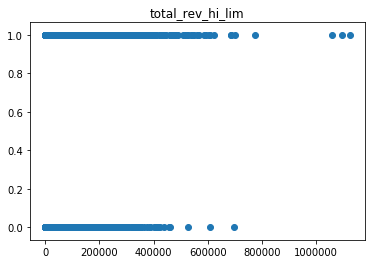

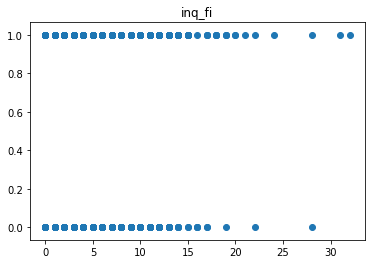

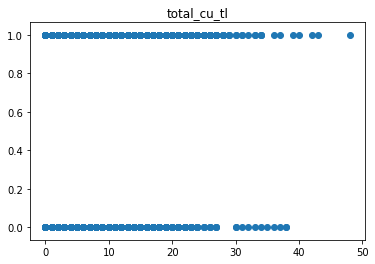

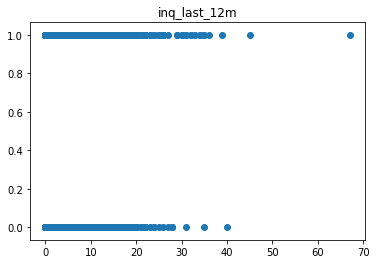

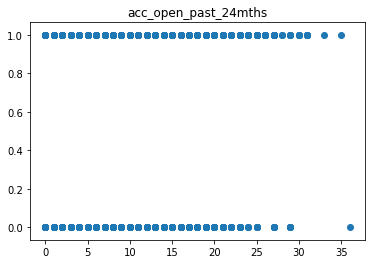

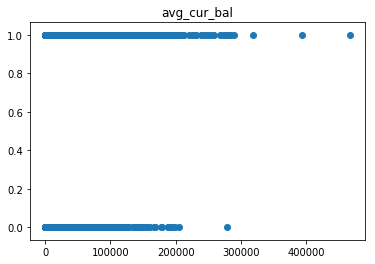

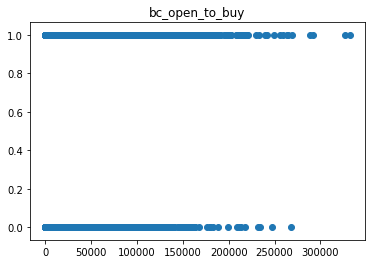

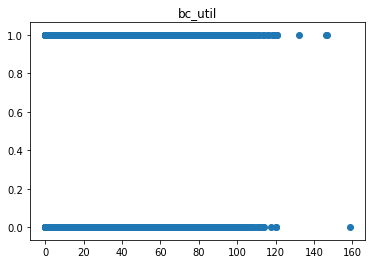

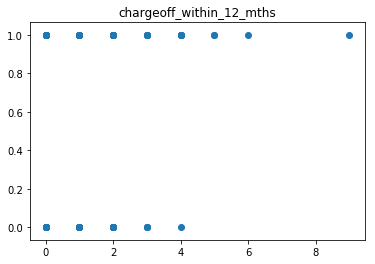

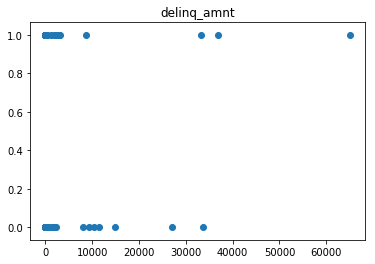

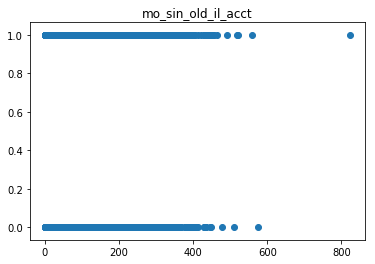

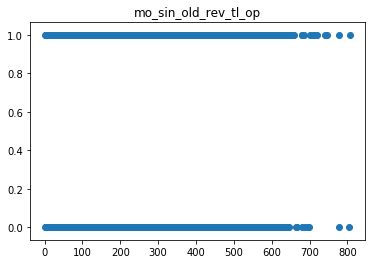

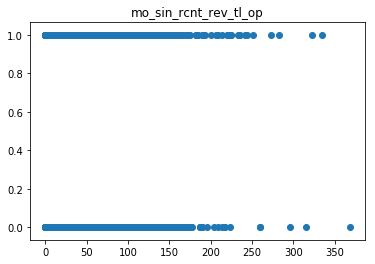

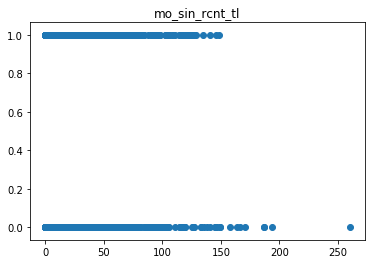

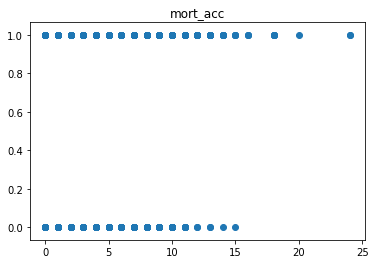

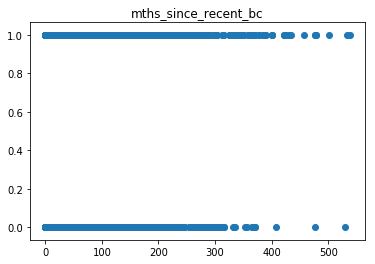

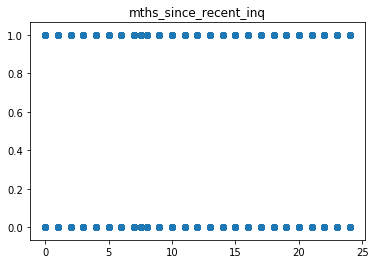

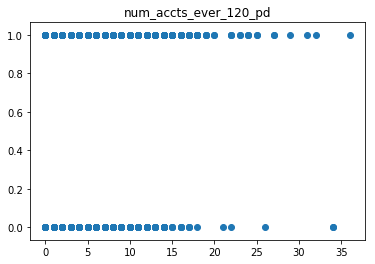

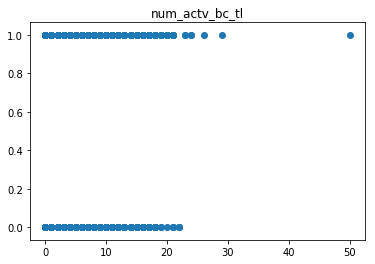

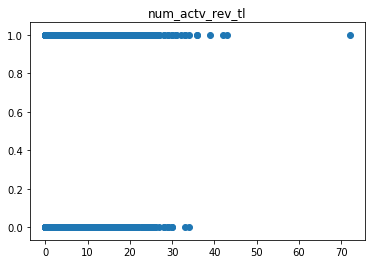

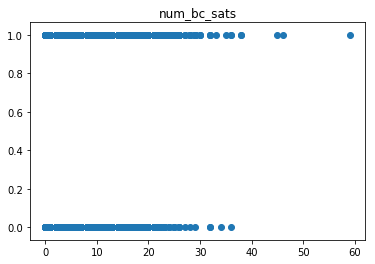

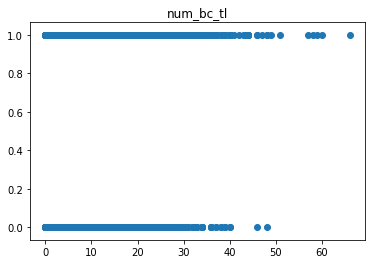

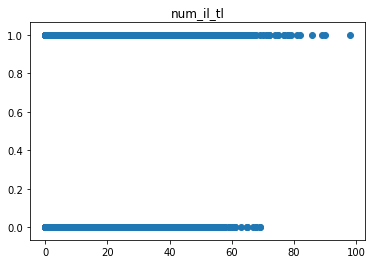

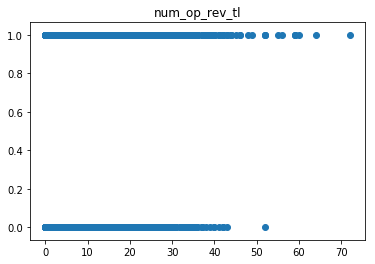

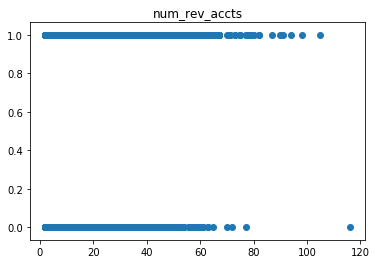

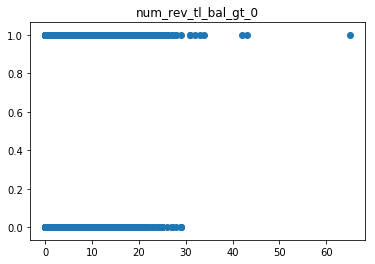

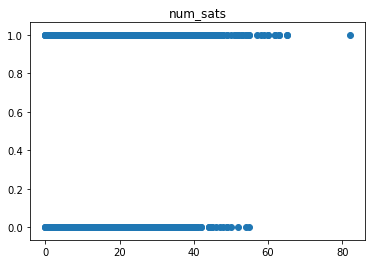

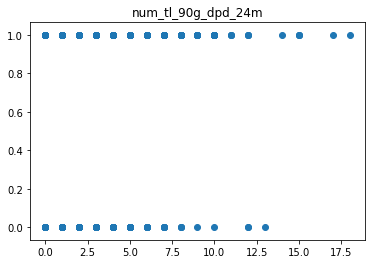

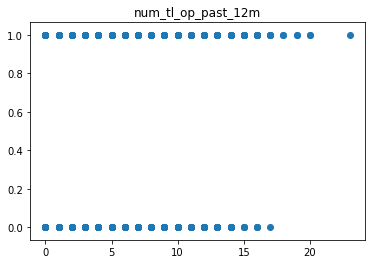

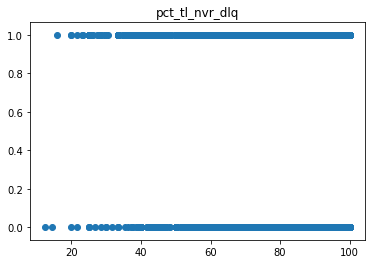

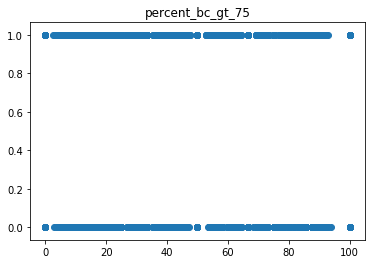

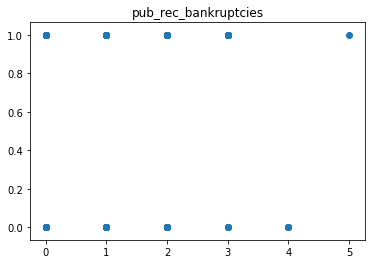

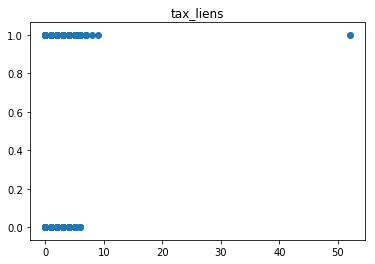

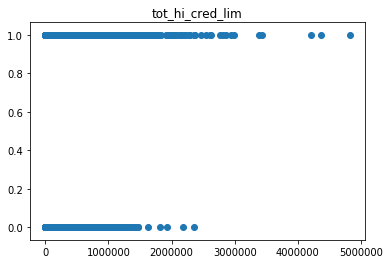

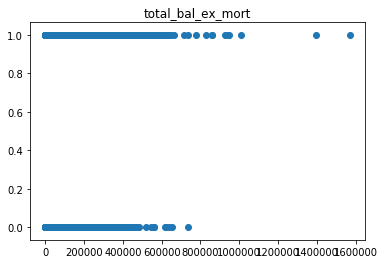

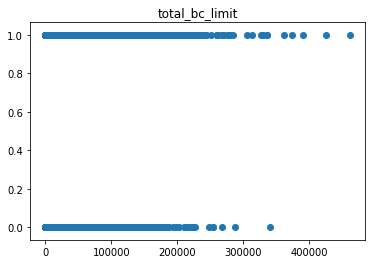

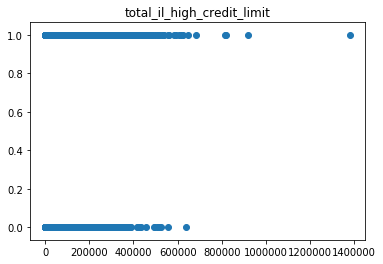

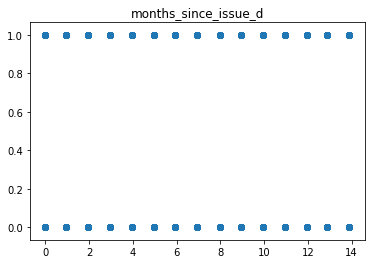

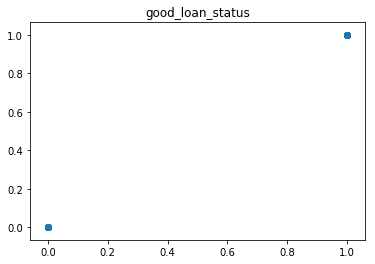

In [49]:
for var in loans_numerical:
    plt.scatter(x=loans[var], y=loans['good_loan_status'])
    plt.title(var)
    plt.show()

In [50]:
# loans_numerical.describe(percentiles=[.25,.5,.75,.90,.95,.99])

In [51]:
'''for cat in loans_categorical:
    sns.countplot(y="good_loan_status", hue=cat, data=loans_cateorical, palette="colorblind")
   # plt.show()

    #plt.violinplot(loans[cat], loans['good_loan_status'])
    plt.title(var)
    plt.show()'''

'for cat in loans_categorical:\n    sns.countplot(y="good_loan_status", hue=cat, data=loans_cateorical, palette="colorblind")\n   # plt.show()\n\n    #plt.violinplot(loans[cat], loans[\'good_loan_status\'])\n    plt.title(var)\n    plt.show()'

In [52]:
'''sns.set(style="ticks")

loans = sns.load_dataset("good_loan_status")
sns.pairplot(loans, hue="delinq_amnt")'''

'sns.set(style="ticks")\n\nloans = sns.load_dataset("good_loan_status")\nsns.pairplot(loans, hue="delinq_amnt")'

In [53]:
loans_categorical.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status',
       'application_type'],
      dtype='object')

In [54]:
'''delinq_amnt = sns.load_dataset("delinq_amnt")
sns.catplot(x="issue_d", y="max_bal_bc", data=delinq_amnt);'''

'delinq_amnt = sns.load_dataset("delinq_amnt")\nsns.catplot(x="issue_d", y="max_bal_bc", data=delinq_amnt);'

<Figure size 1008x648 with 0 Axes>

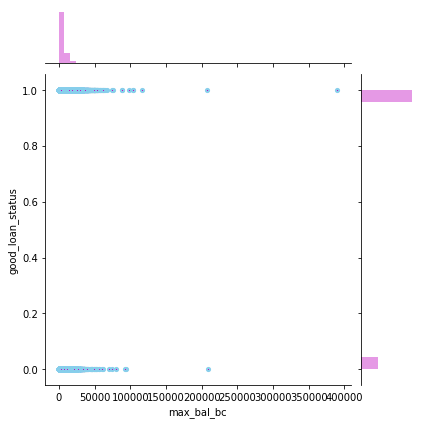

In [55]:
plt.figure(figsize=(14, 9))
sns.jointplot(x=loans["max_bal_bc"], y=loans['good_loan_status'], kind='scatter',
              s=10, color='m', edgecolor="skyblue", linewidth=2)

<Figure size 1008x648 with 0 Axes>

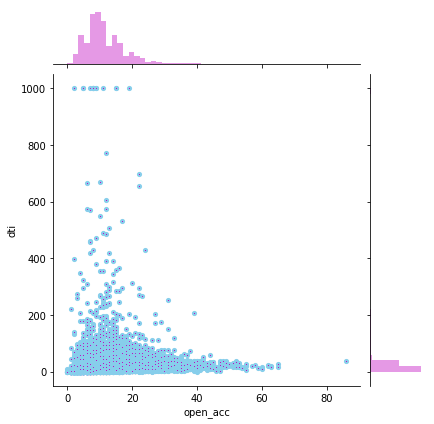

In [56]:
plt.figure(figsize=(14, 9))
sns.jointplot(x=loans["open_acc"], y=loans["dti"], kind='scatter',
              s=10, color='m', edgecolor="skyblue", linewidth=2)

<Figure size 1008x648 with 0 Axes>

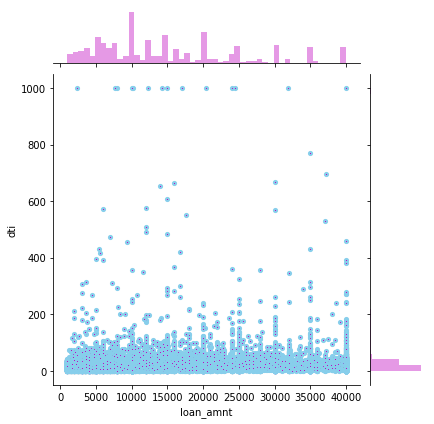

In [57]:
plt.figure(figsize=(14, 9))
sns.jointplot(x=loans["loan_amnt"], y=loans["dti"], kind='scatter',
              s=10, color='m', edgecolor="skyblue", linewidth=2)

<Figure size 1008x648 with 0 Axes>

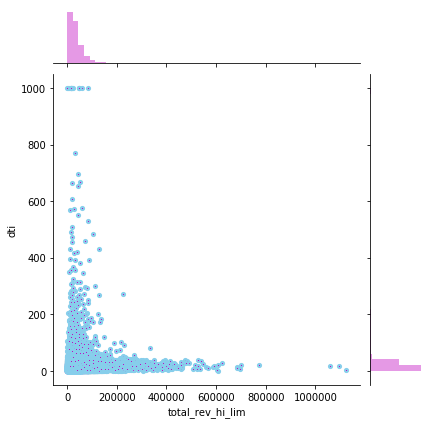

In [58]:
plt.figure(figsize=(14, 9))
sns.jointplot(x=loans["total_rev_hi_lim"], y=loans["dti"], kind='scatter',
              s=10, color='m', edgecolor="skyblue", linewidth=2)

___Loan amount and annual income comparison.  There are more 10k loans distributed than any other amount.___ 

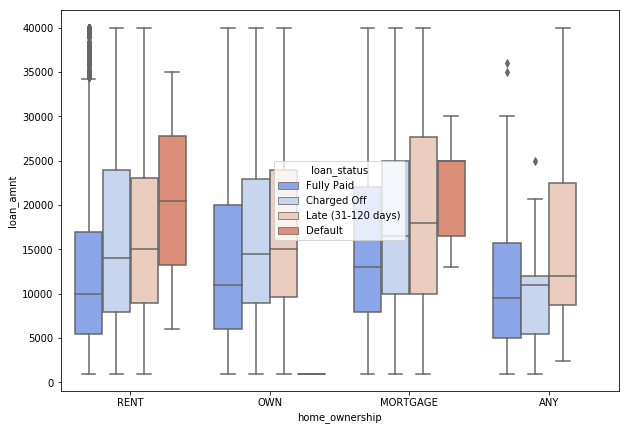

In [59]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="home_ownership", y="loan_amnt",
            hue="loan_status", data=loans, palette="coolwarm")

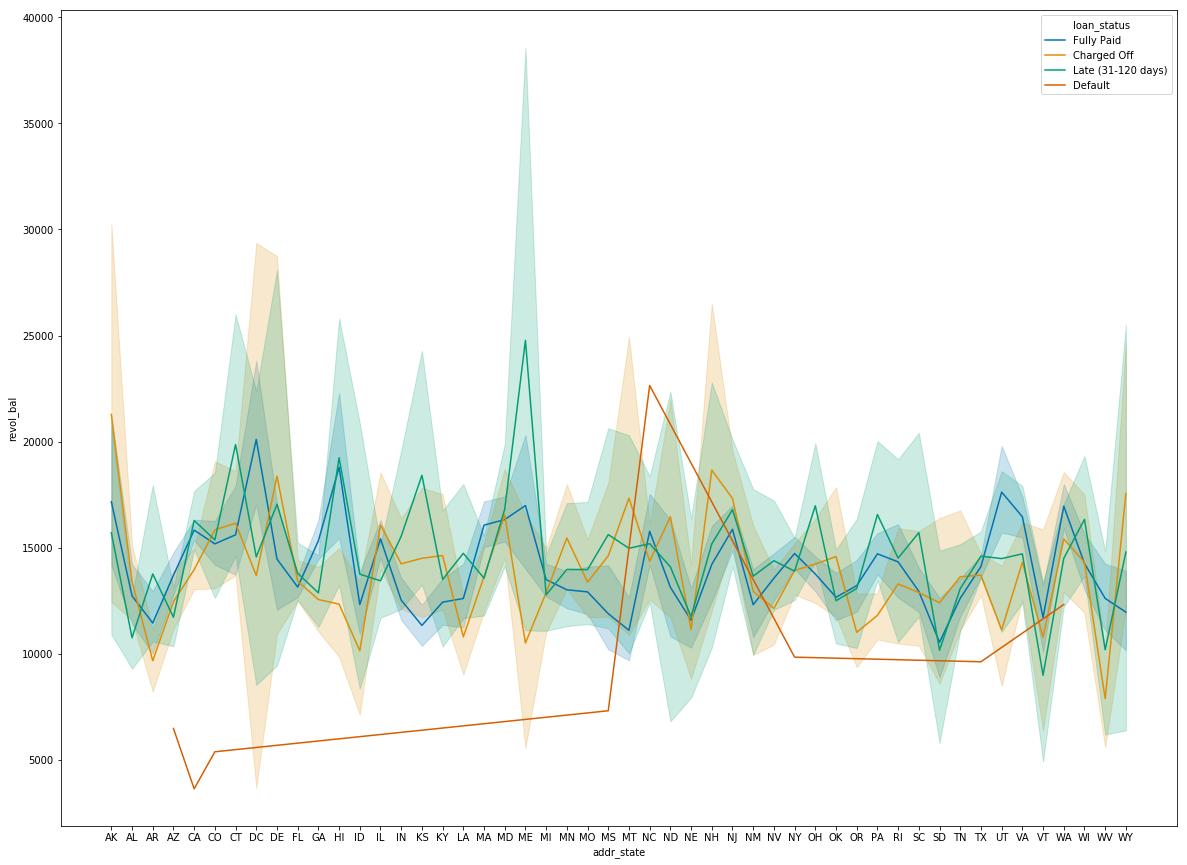

In [60]:
plt.figure(figsize=(20, 15))
sns.lineplot(x="addr_state", y="revol_bal",
             hue="loan_status", data=loans, palette="colorblind")

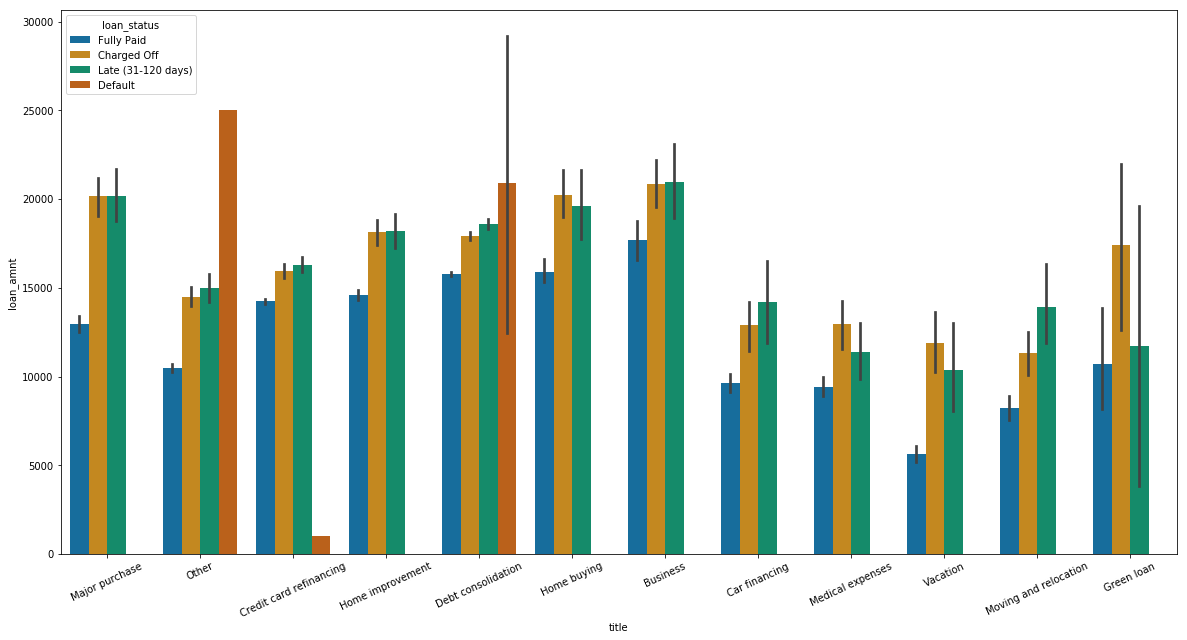

In [61]:
plt.figure(figsize=(20, 10))
sns.barplot(x="title",
            y="loan_amnt",
            hue="loan_status",
            data=loans,
            palette="colorblind")
plt.xticks(rotation=25)

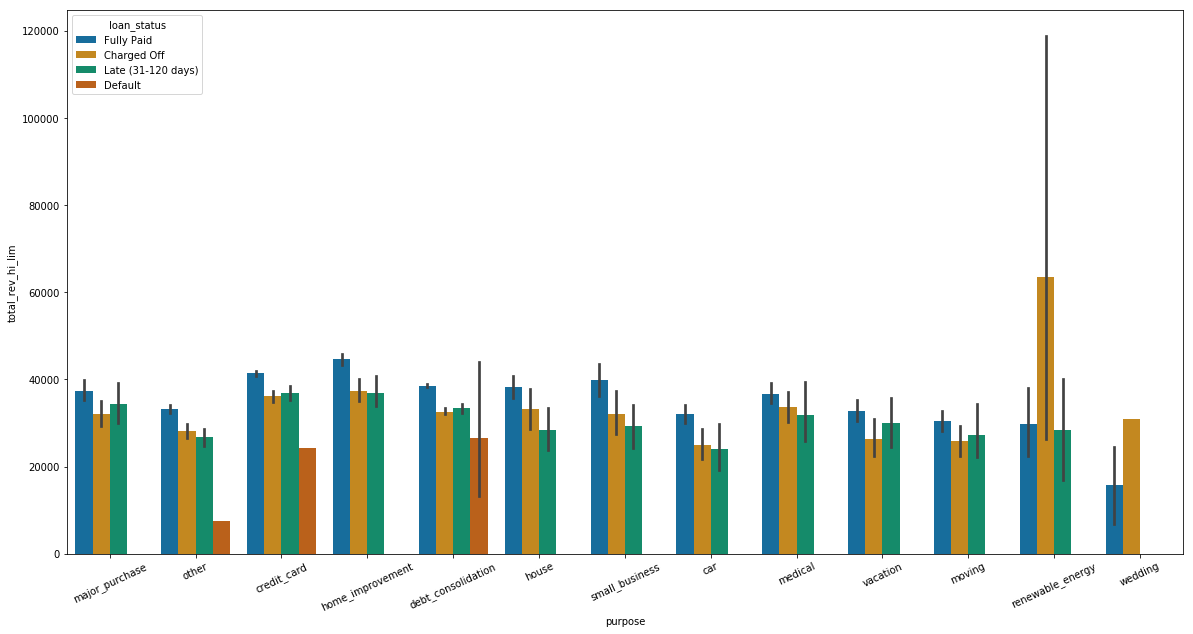

In [62]:
plt.figure(figsize=(20, 10))
sns.barplot(x="purpose",
            y="total_rev_hi_lim",
            hue="loan_status",
            data=loans,
            palette="colorblind")
plt.xticks(rotation=25)

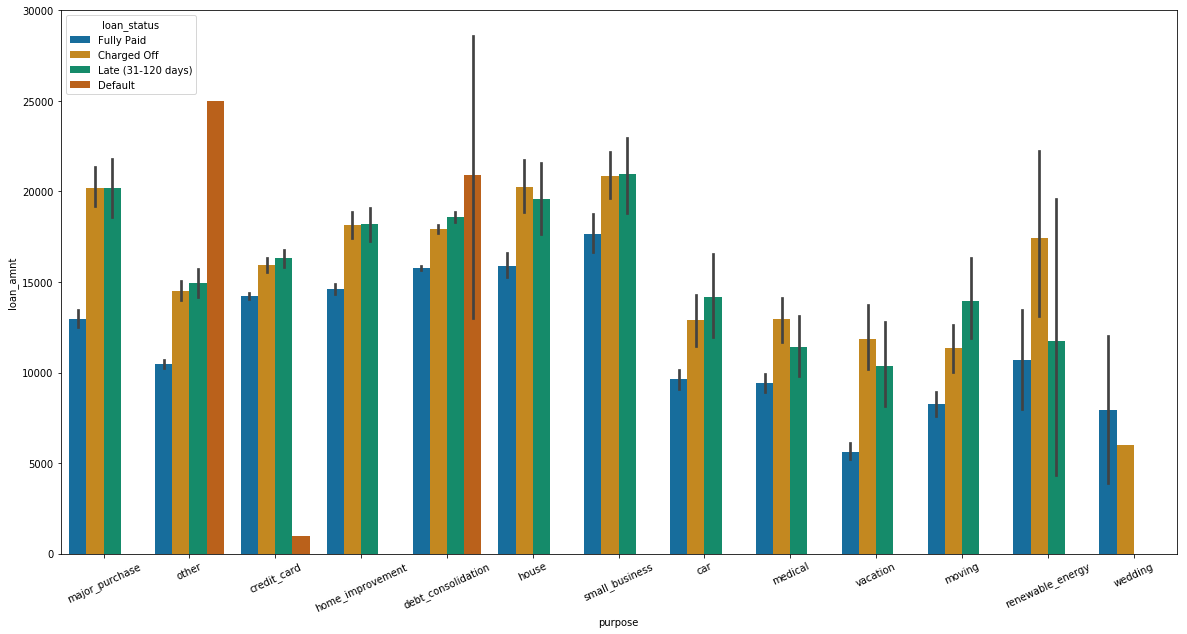

In [63]:
plt.figure(figsize=(20, 10))
sns.barplot(x="purpose",
            y="loan_amnt",
            hue="loan_status",
            data=loans,
            palette="colorblind")
plt.xticks(rotation=25)

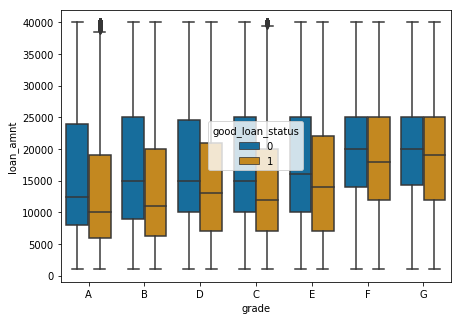

In [64]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="grade", y="loan_amnt", hue="good_loan_status",
            data=loans, palette="colorblind")

___This is what to be expected, the larger the loan the longer the term to pay it back.___

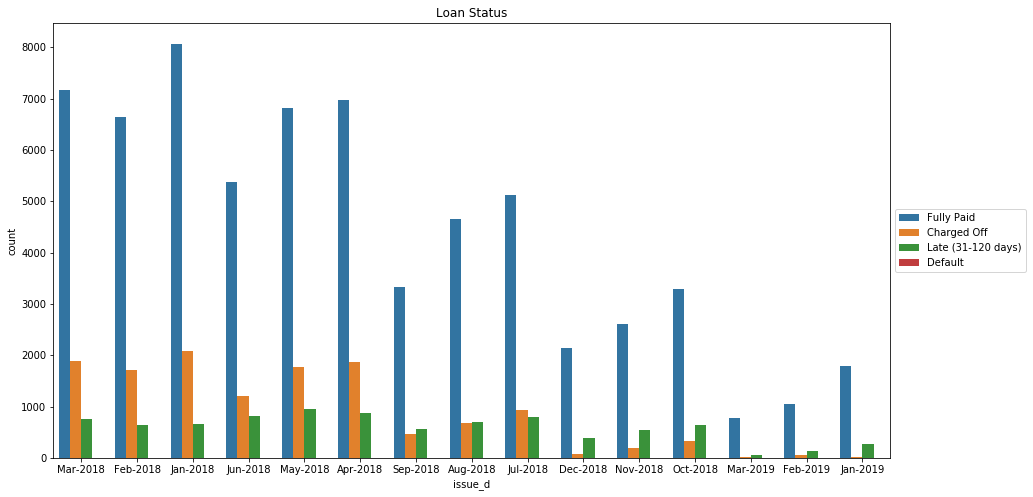

In [65]:
plt.figure(figsize=(15, 8))
sns.countplot(x='issue_d', hue='loan_status', data=loans)
plt.title('Loan Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

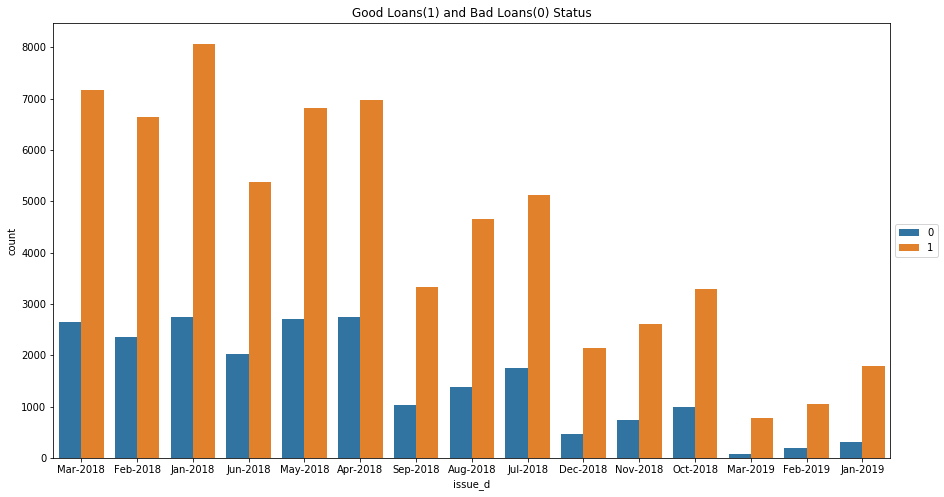

In [66]:
plt.figure(figsize=(15, 8))
sns.countplot(x='issue_d', hue='good_loan_status', data=loans)
plt.title('Good Loans(1) and Bad Loans(0) Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


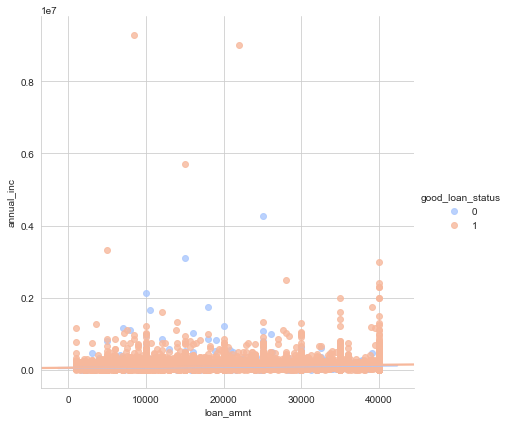

In [67]:
sns.set_style('whitegrid')
sns.lmplot('loan_amnt', 'annual_inc', data=loans, hue='good_loan_status',
           palette='coolwarm', size=6, aspect=1, fit_reg=True)

In [68]:
#plt.figure(figsize=(40, 40))
#corr = loans.iloc[:, 1:].corr()
# corr

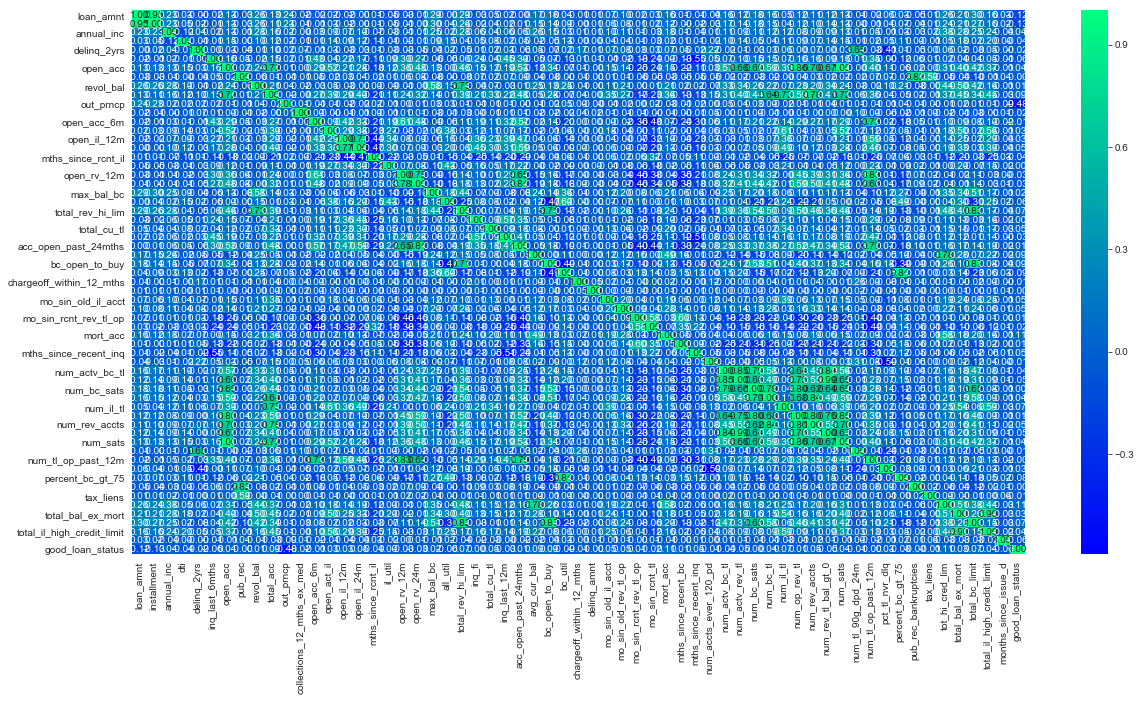

In [69]:
# Is there collinearity?
plt.figure(figsize=(20, 10))
sns.heatmap(data=loans_numerical.corr(), cmap="winter", fmt=".2f", annot=True)

In [70]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(
        np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out


trimm_correlated(loans, 10)

loan_amnt  installment  annual_inc    dti  delinq_2yrs  \
5          3000.0        93.10     52000.0   0.58          0.0   
14         5000.0       166.03     55000.0  14.18          0.0   
23        20300.0       509.66     55000.0  26.63          0.0   
28         7000.0       232.44     40000.0  20.25          0.0   
34        10000.0       326.92     52320.0  12.87          0.0   
39        28000.0       915.36    103000.0  30.76          0.0   
43        40000.0       838.71    150000.0   4.09          0.0   
44        30000.0      1143.39     57000.0  27.58          0.0   
45        21000.0       560.94     85000.0  15.76          1.0   
49         5000.0       150.56     36610.0  13.85          0.0   
54        12500.0       387.91    110000.0  14.10          0.0   
64        20000.0       466.10     92000.0  11.40          0.0   
66        15000.0       456.81     86000.0   9.66          0.0   
68        14100.0       552.23    128000.0  14.12          1.0   
72         3000.0        93.10     50000.0  36.44          0.0   
75        30000.0      1091.36     84000.0  12.07          8.0   
77        12000.0       410.54     38000.0  21.45          0.0   
85        12000.0       416.22     43000.0  22.75          0.0   
86        18500.0       628.52     82985.0  18.66          1.0   
87        19000.0       487.14     50000.0  17.76          2.0   
88         3125.0       119.11    100000.0  36.21          0.0   
94        17000.0       555.76     70000.0  22.05          0.0   
100       24000.0       815.38     73620.0  18.47          1.0   
101       20000.0       607.97     33500.0  24.40          0.0   
105       10000.0       307.45     60000.0   1.36          0.0   
107       20000.0       466.10     94796.0  18.13          0.0   
116       25000.0       582.62     35000.0  53.03          0.0   
118       10000.0       233.05     42000.0  24.69          0.0   
122       25000.0       745.71     86000.0  29.75          1.0   
125        1000.0        35.89     51000.0  10.56          0.0   
...           ...          ...         ...    ...          ...   
115149    10000.0       264.50    170000.0   4.69          1.0   
115174     3600.0       117.39     83000.0  13.00          0.0   
115214     6500.0       252.98     21404.0  25.24          0.0   
115217    16250.0       386.76     63000.0  23.49          0.0   
115218     1000.0        40.46     54000.0  34.04          2.0   
115227    17500.0       544.85     77000.0   9.40          0.0   
115228    40000.0       814.70    150000.0   7.08          0.0   
115232    40000.0      1235.45    150000.0   9.77          0.0   
115308     7500.0       235.69    119000.0  10.43          0.0   
115329    10000.0       346.76     50000.0  37.21          1.0   
115343     6000.0       188.55     60000.0   4.52          1.0   
115365    20000.0       634.23    120000.0  18.84          0.0   
115368     9500.0       312.42     62000.0  20.27          0.0   
115388    20000.0       662.38    125000.0  22.78          0.0   
115409    18000.0       388.86     52000.0   7.85          0.0   
115444     5000.0       185.62    104000.0  22.01          0.0   
115460    30000.0       648.10     49000.0  13.03          0.0   
115463    10000.0       306.31     65000.0   1.16          0.0   
115513    20000.0       612.62    125000.0   7.38          0.0   
115516    18000.0       659.27     62000.0  10.19          0.0   
115534     7000.0       259.86     20160.0   9.86          2.0   
115544    32000.0      1127.24     63000.0  26.21          0.0   
115552    18100.0       599.46    130000.0   4.30          0.0   
115581    35000.0      1141.22    124000.0  18.12          0.0   
115597    15000.0       583.78     59000.0  30.88          1.0   
115603    25000.0       940.47    100000.0  25.09          1.0   
115609     1000.0        38.92     18000.0  18.40          0.0   
115625    32000.0       988.36    170000.0   5.41          2.0   
115656     6500.0       225.39     70000.0  34.7

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


''

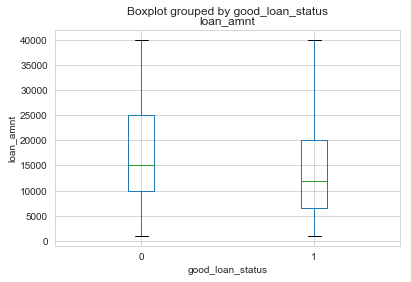

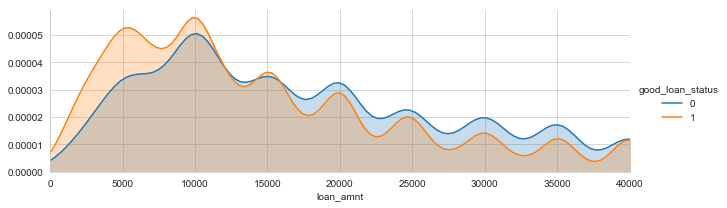

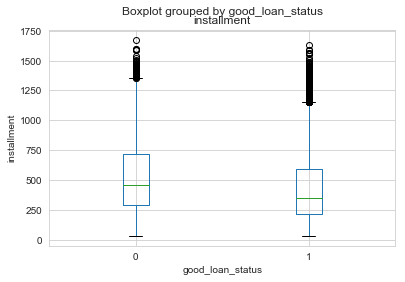

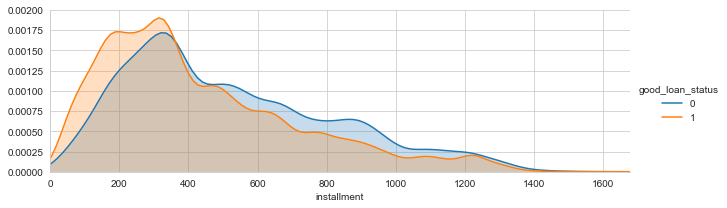

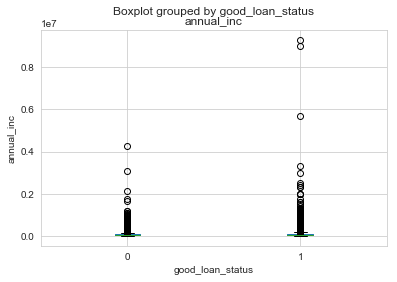

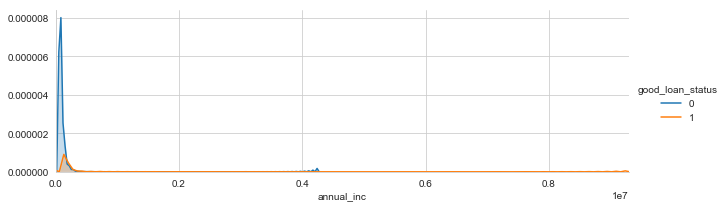

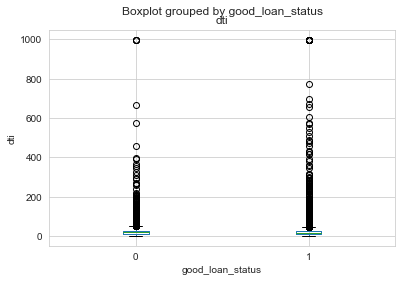

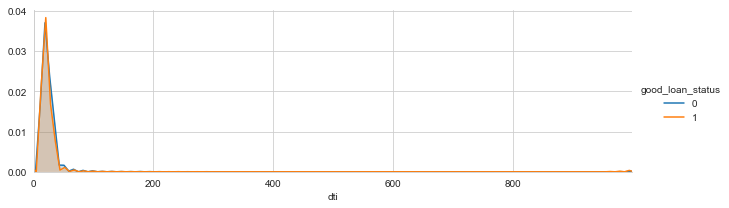

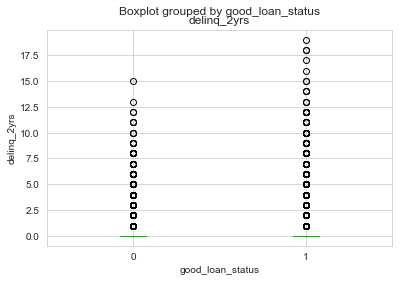

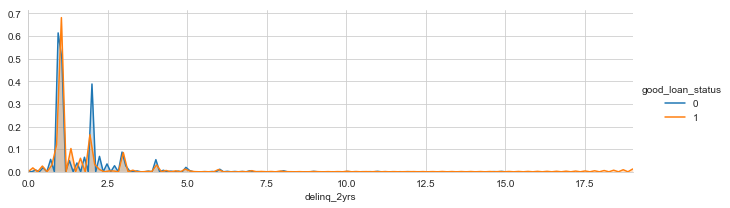

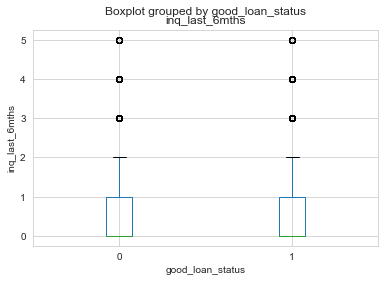

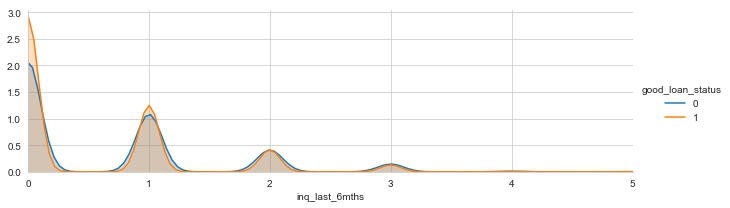

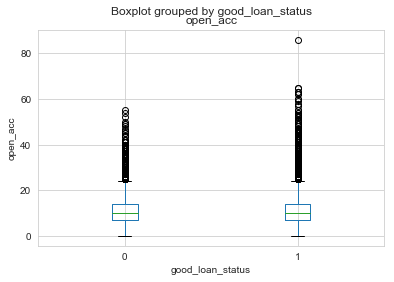

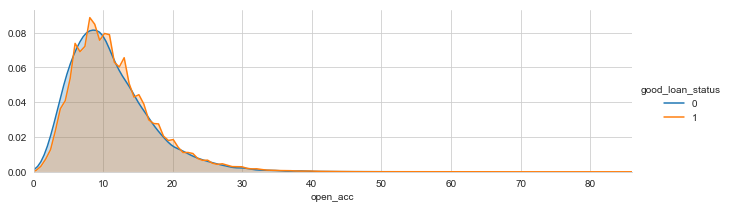

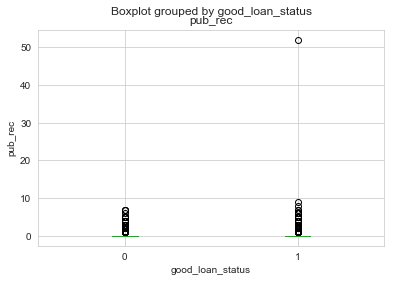

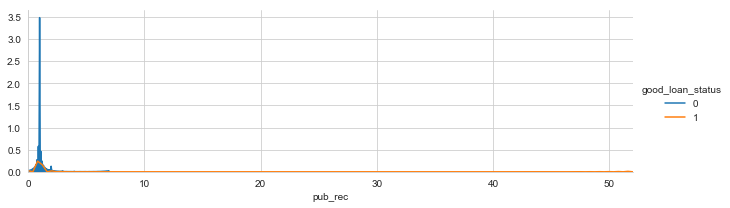

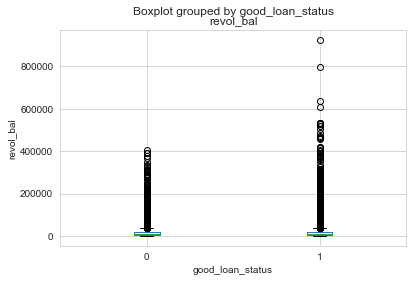

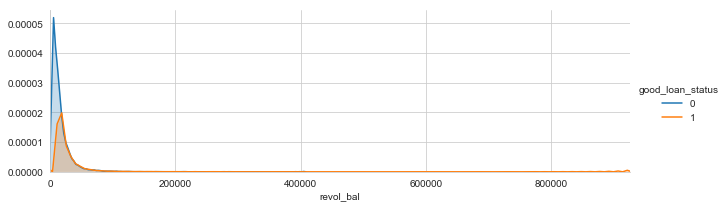

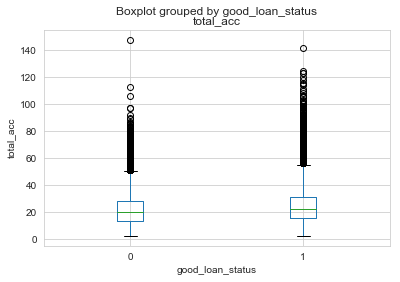

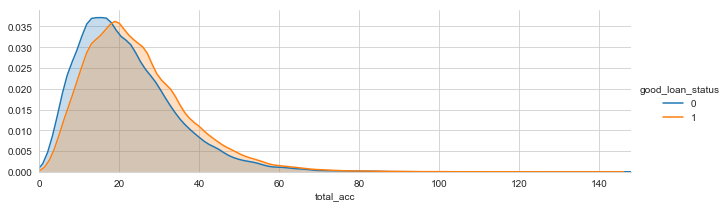

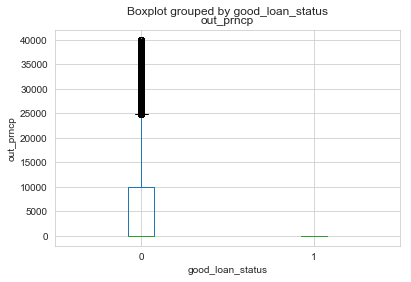

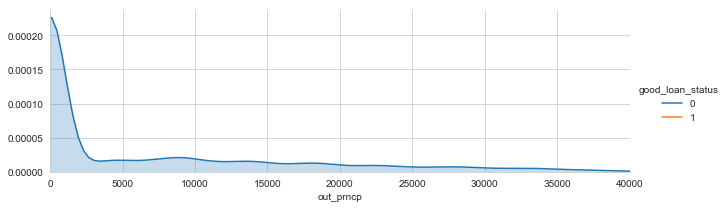

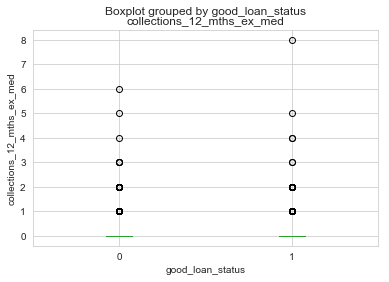

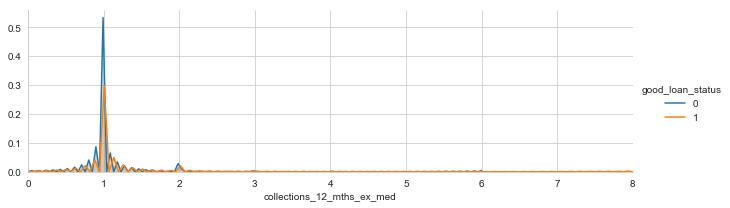

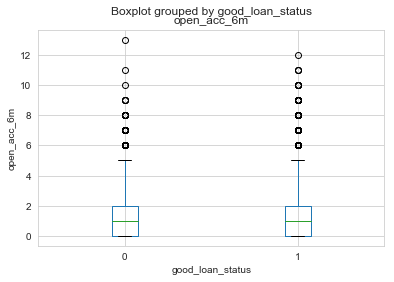

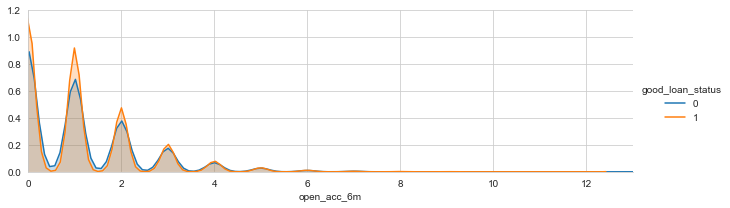

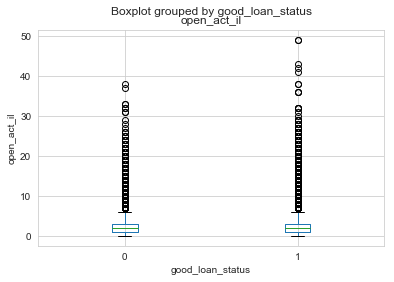

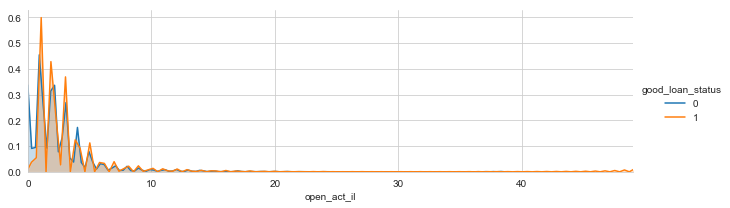

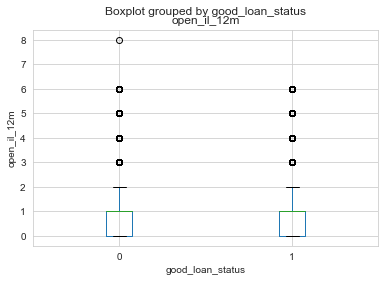

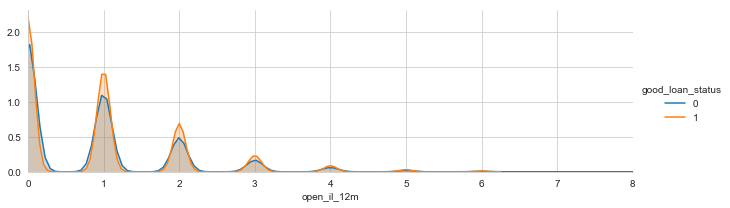

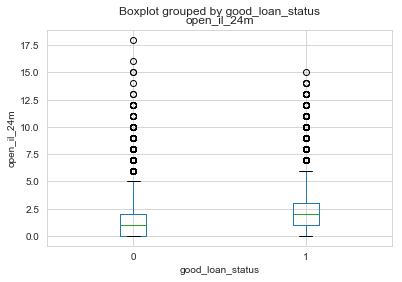

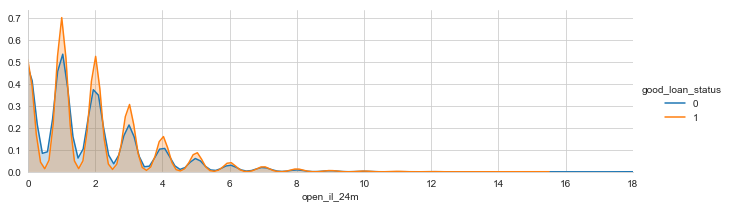

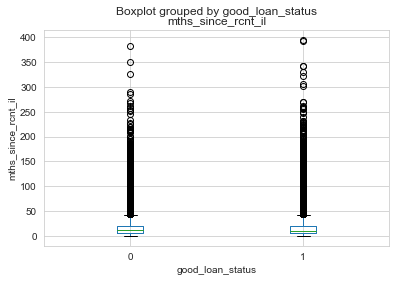

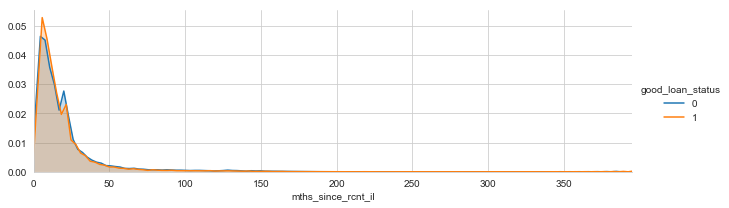

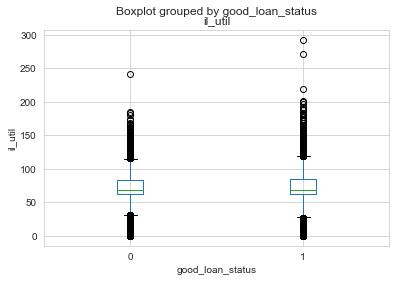

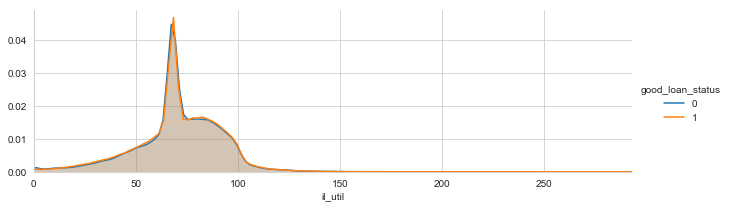

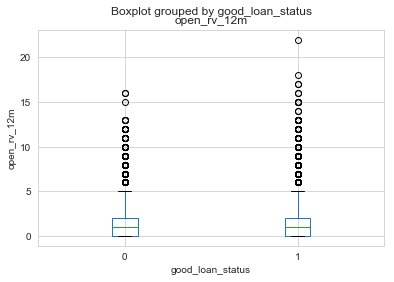

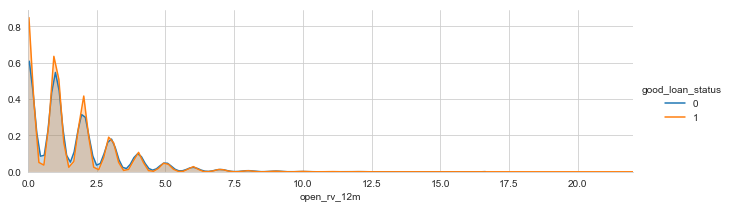

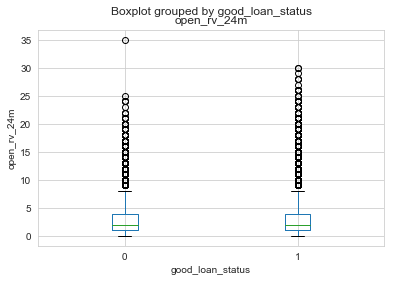

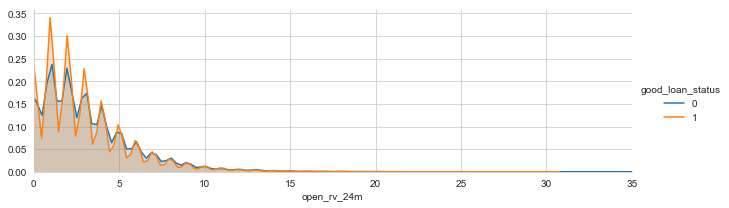

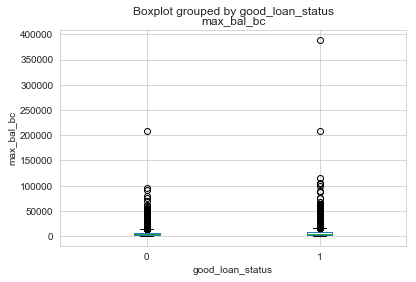

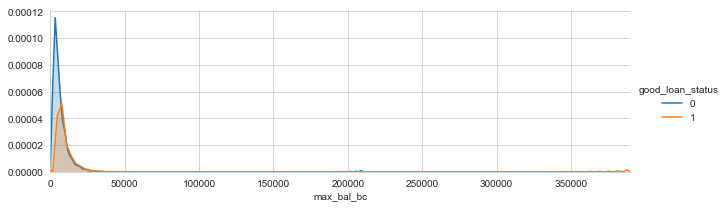

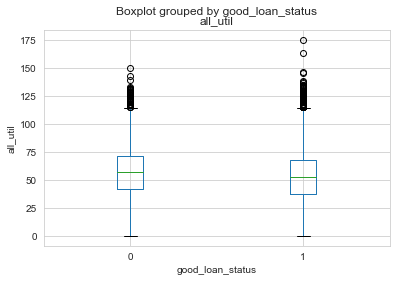

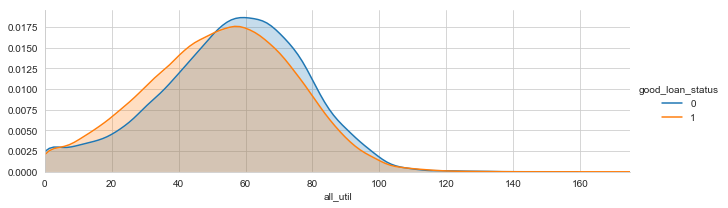

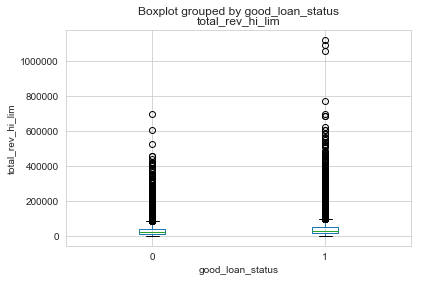

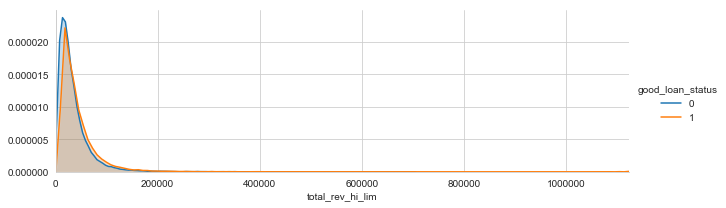

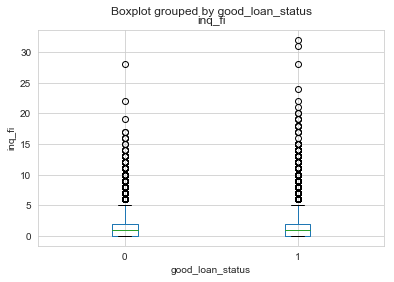

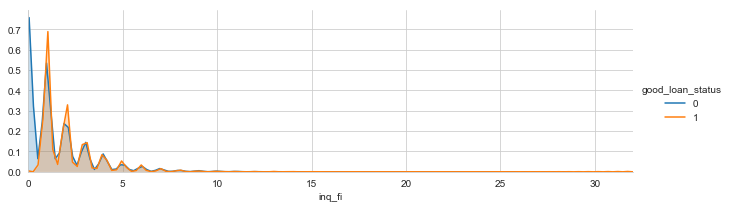

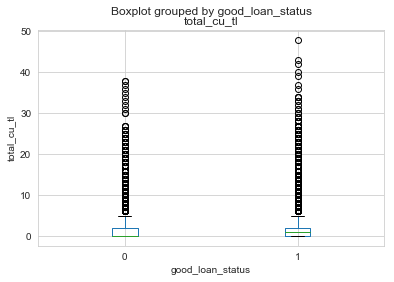

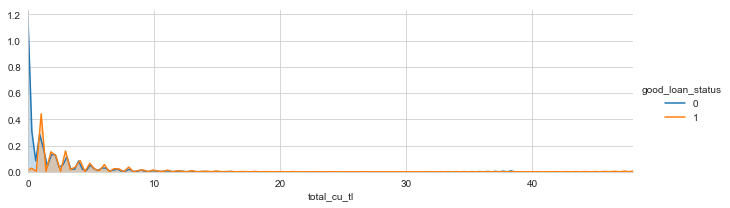

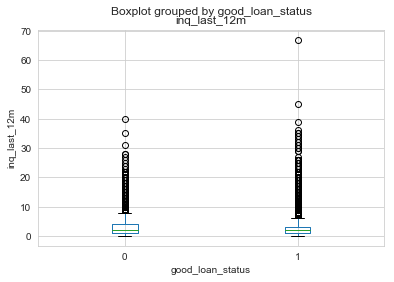

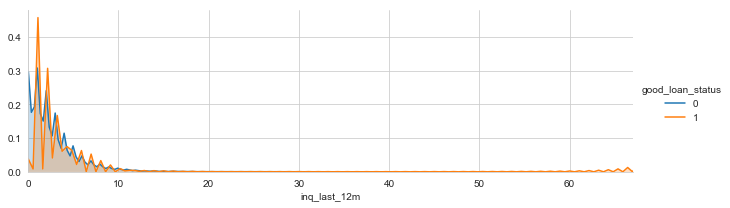

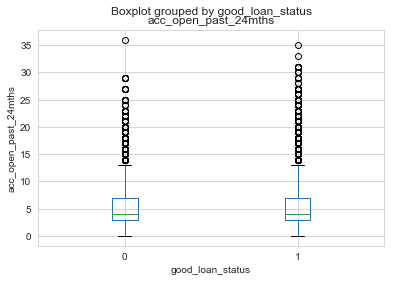

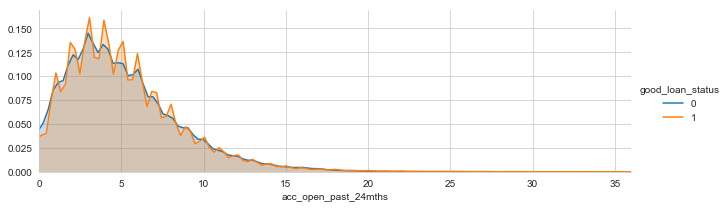

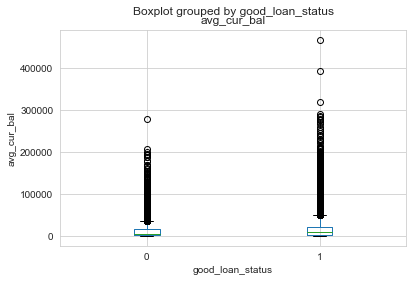

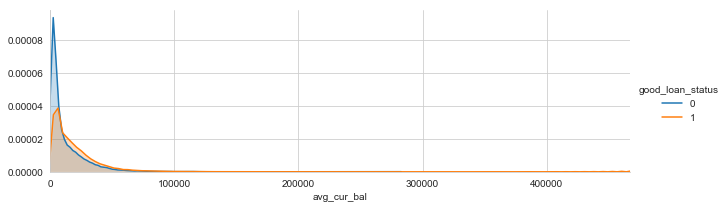

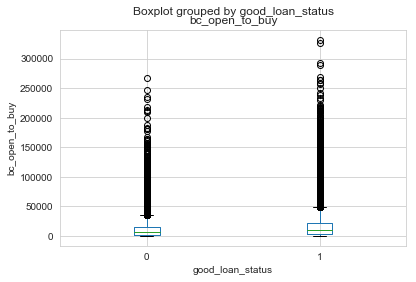

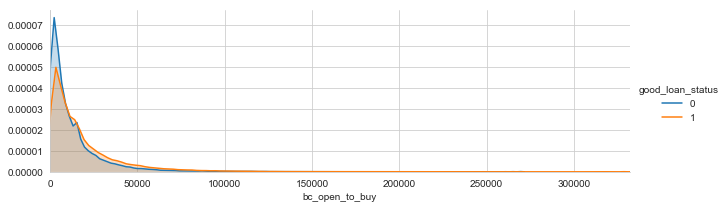

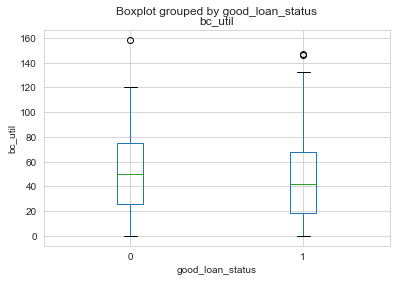

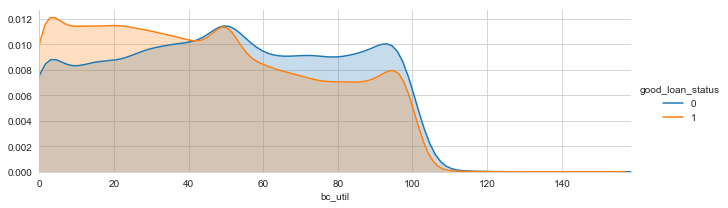

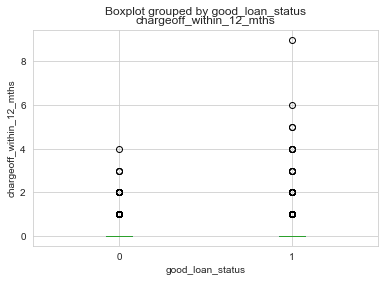

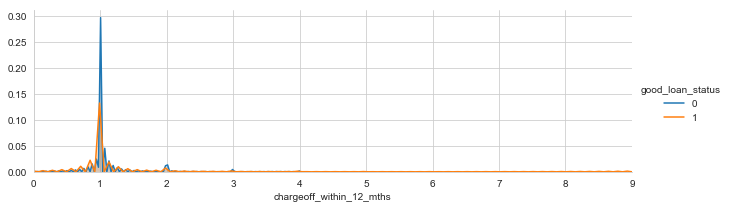

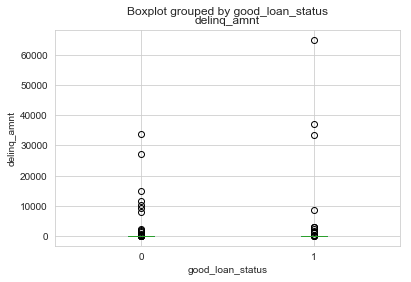

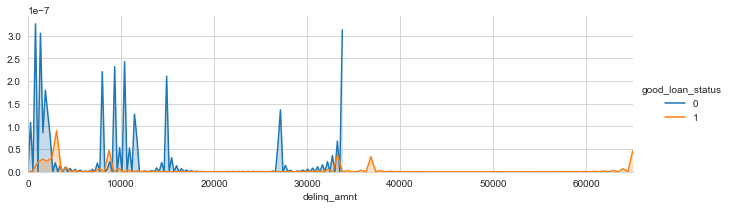

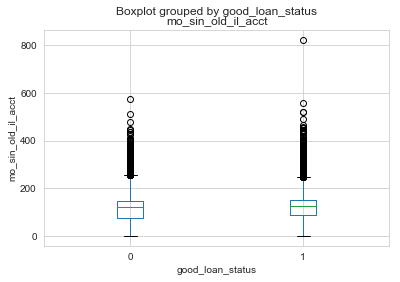

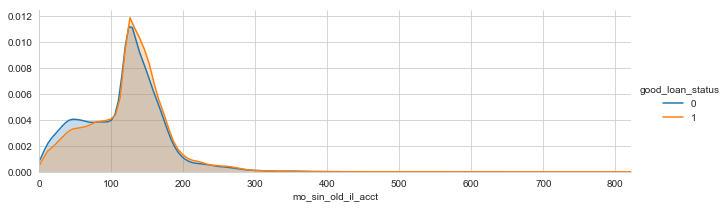

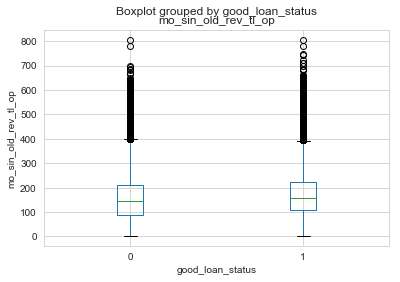

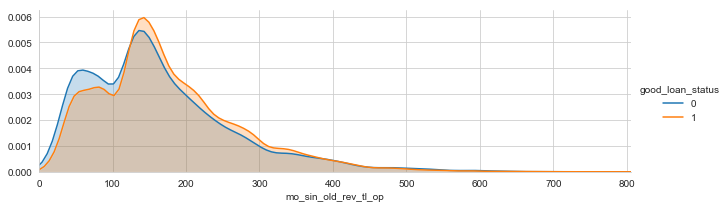

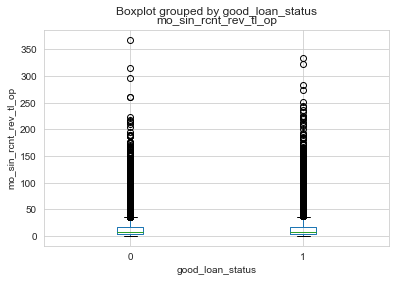

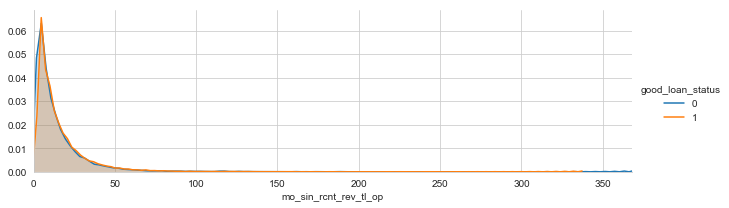

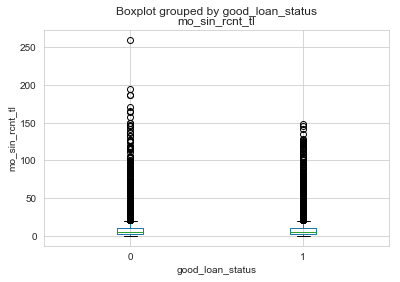

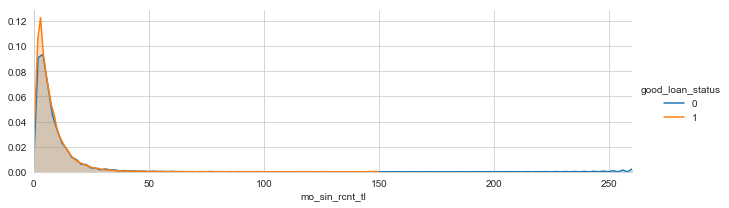

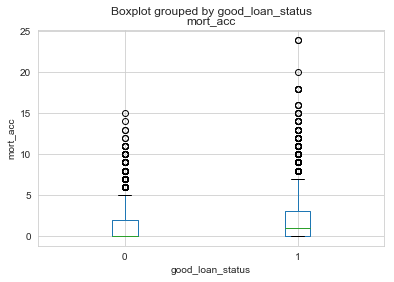

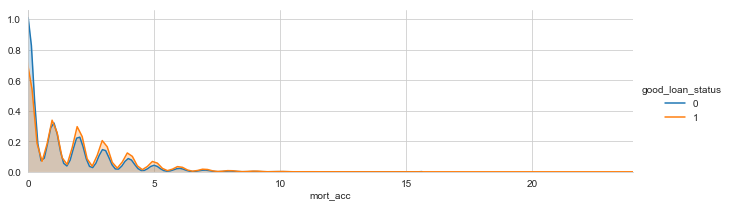

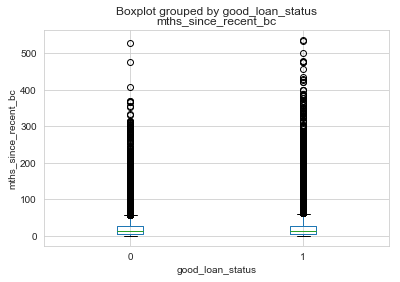

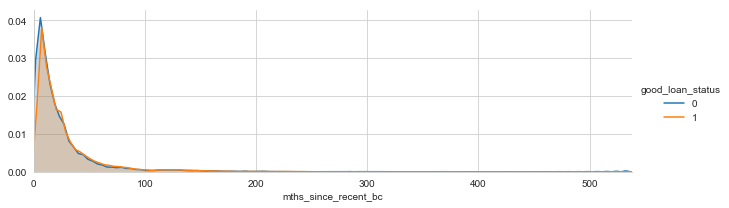

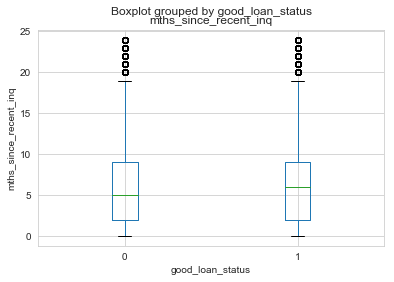

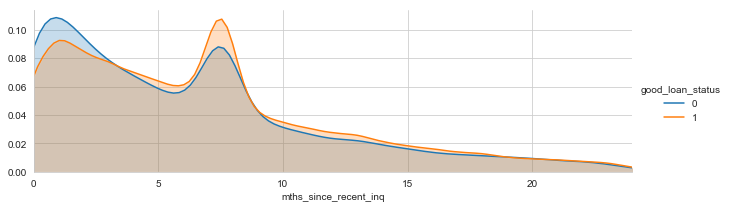

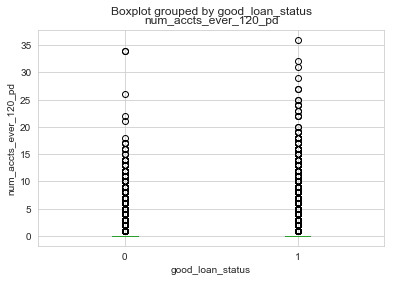

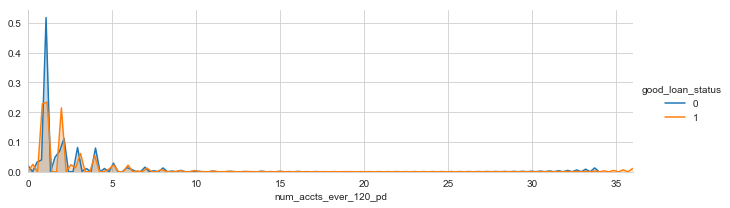

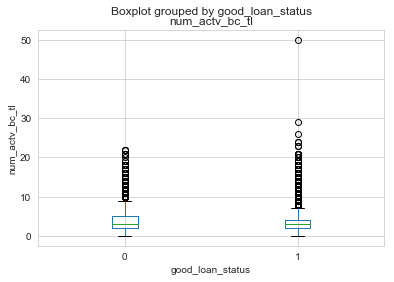

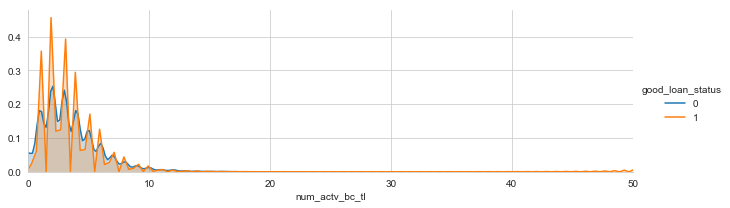

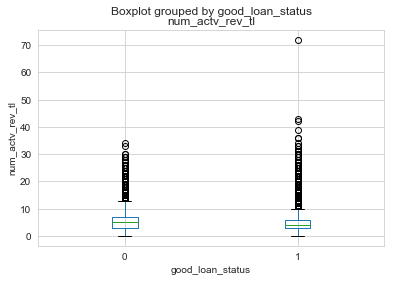

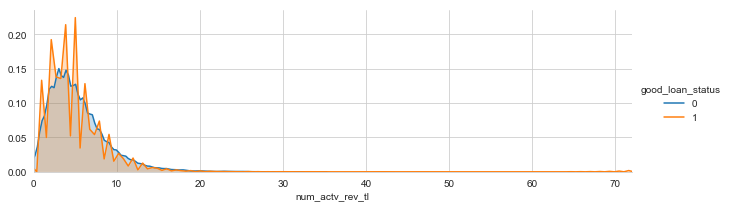

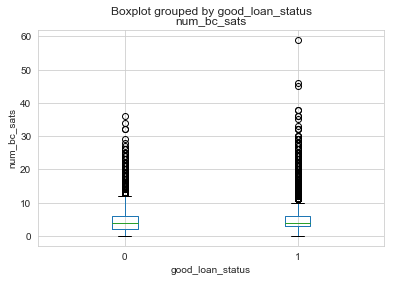

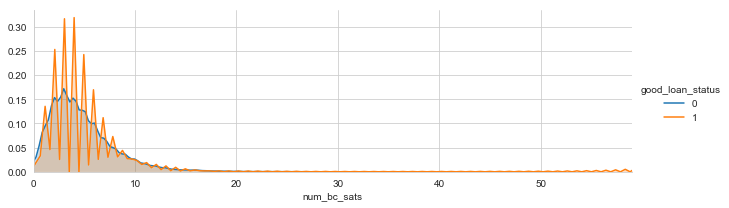

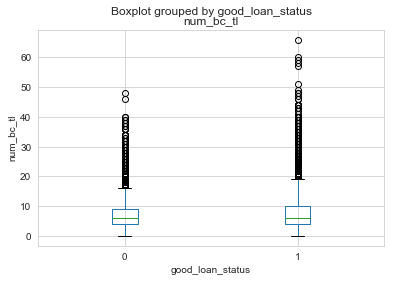

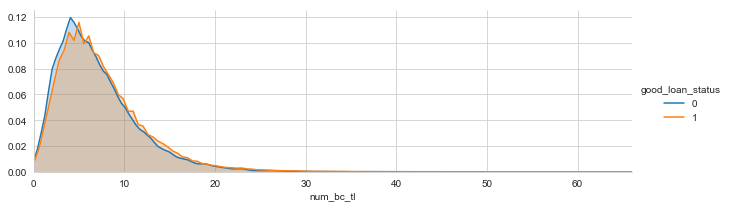

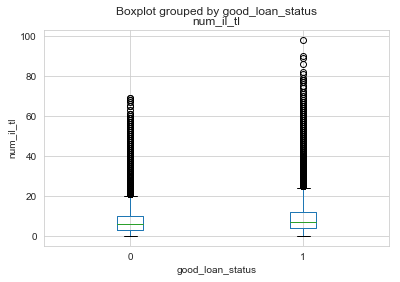

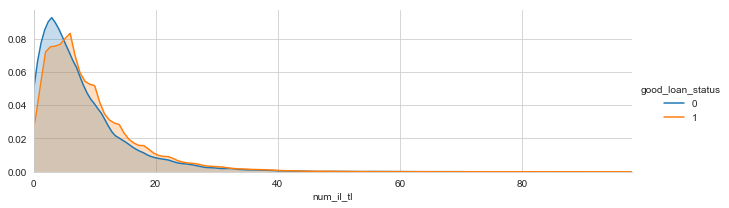

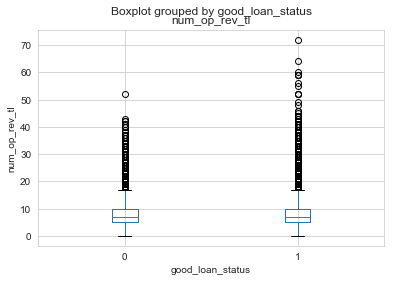

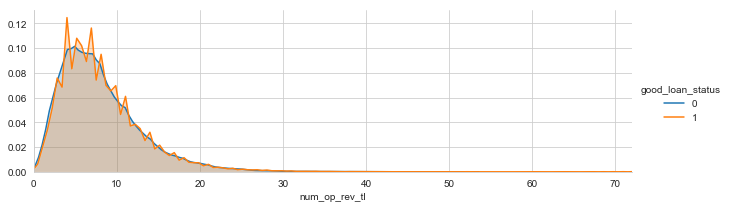

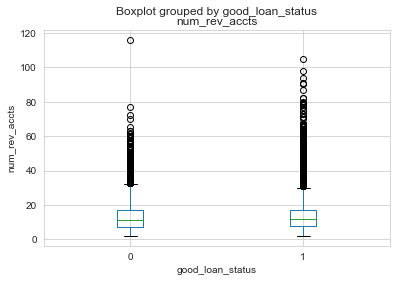

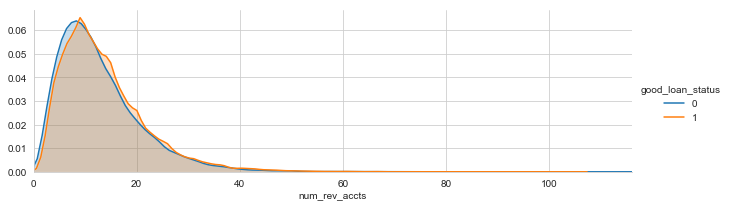

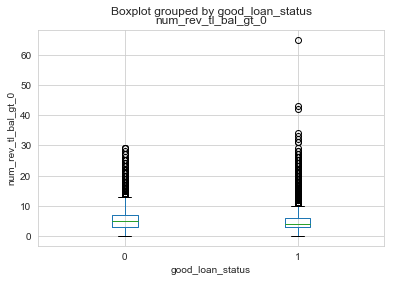

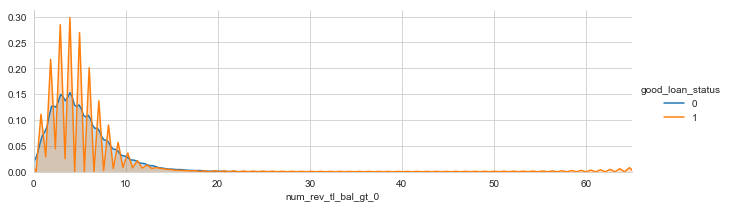

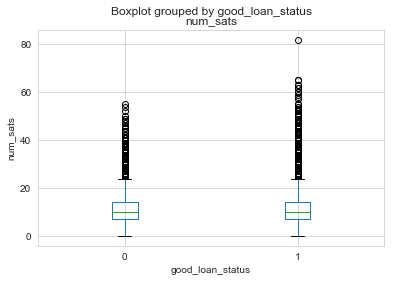

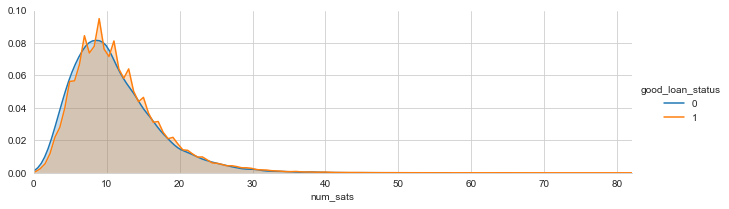

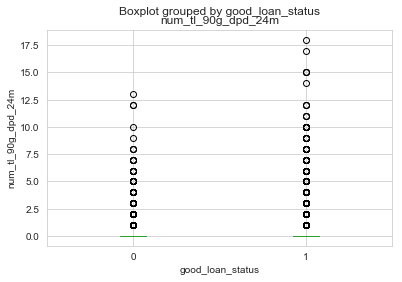

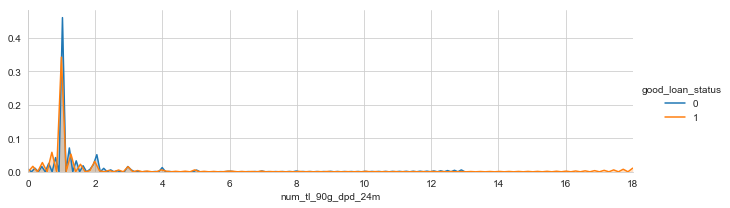

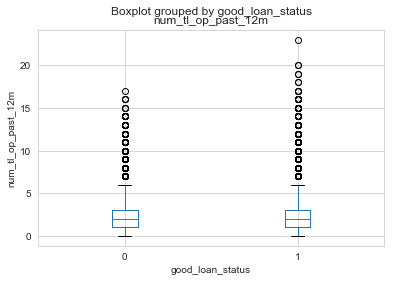

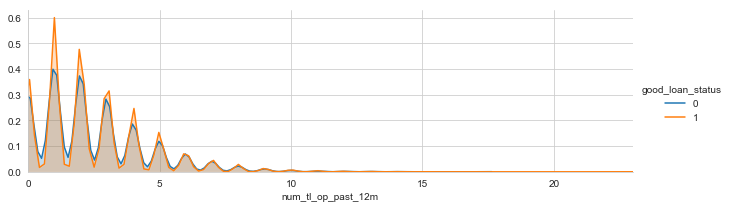

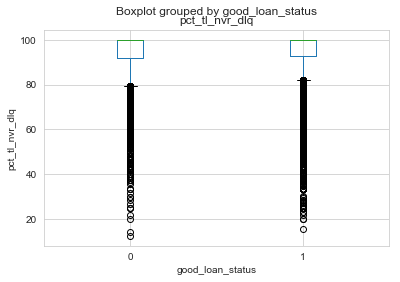

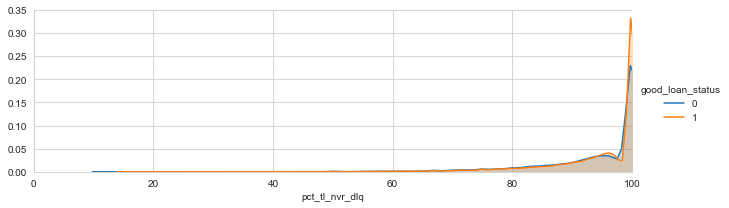

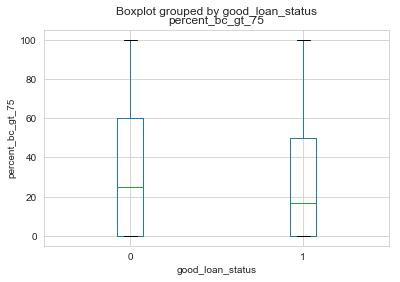

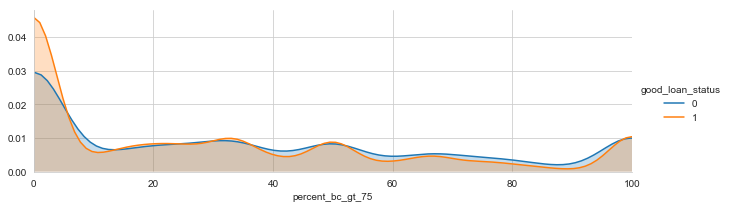

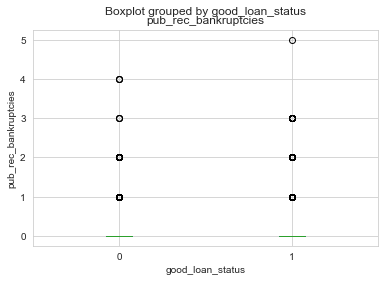

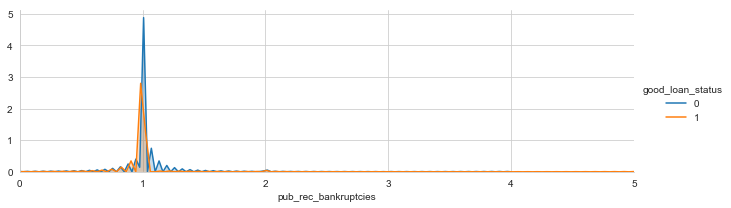

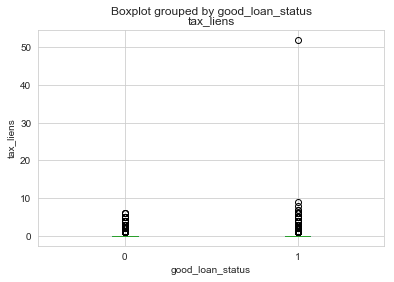

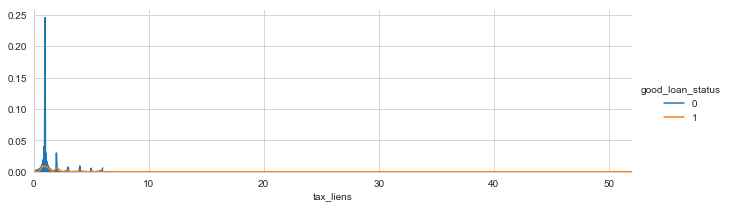

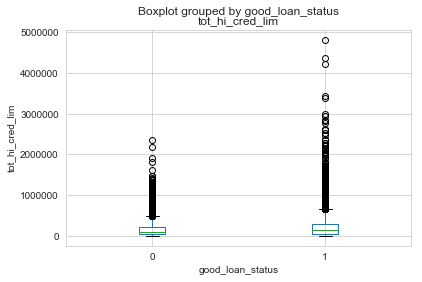

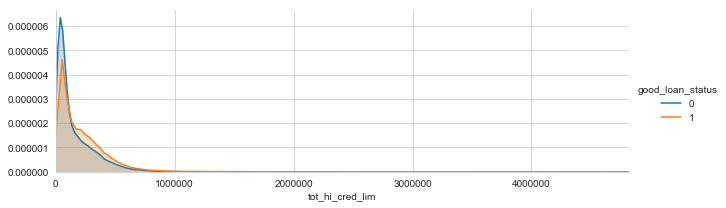

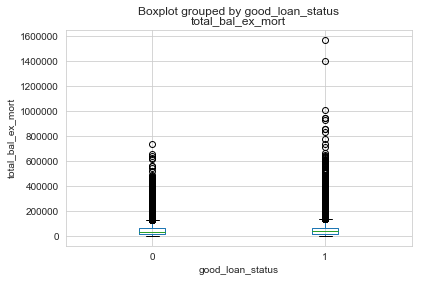

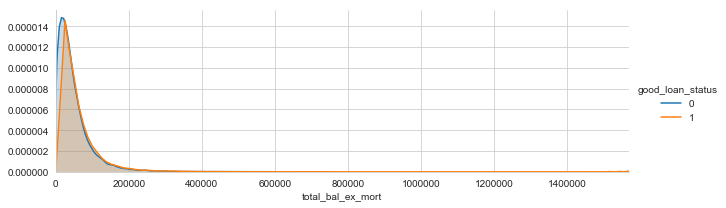

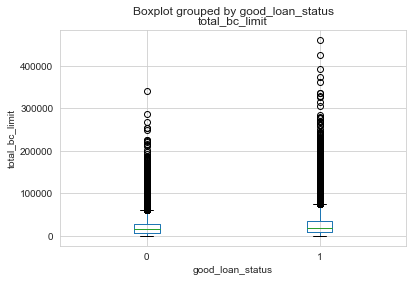

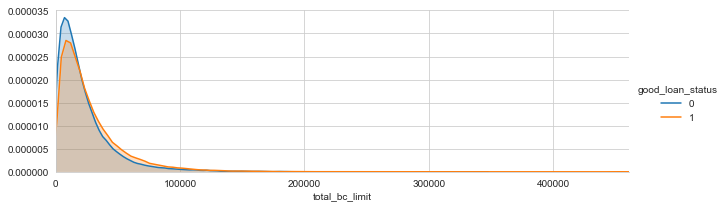

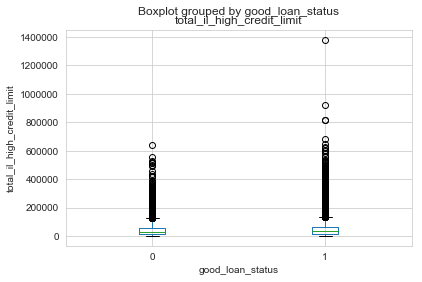

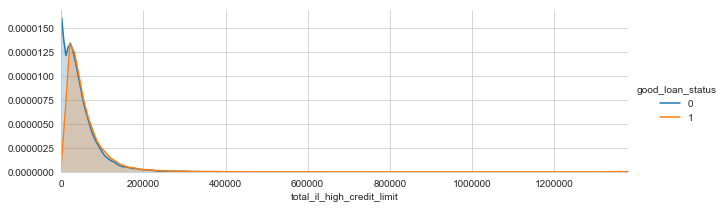

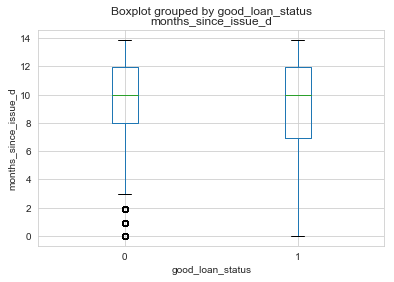

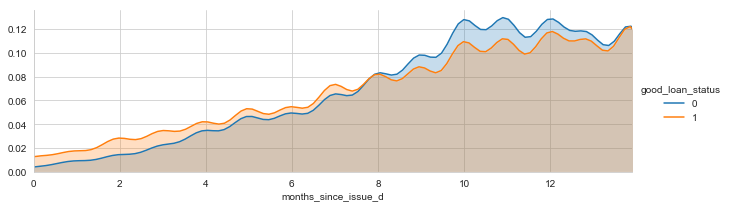

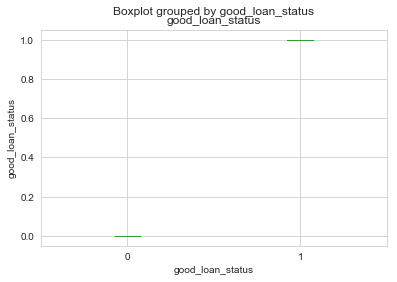

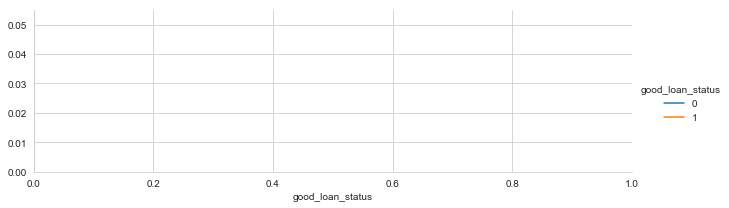

In [71]:
for var in loans_numerical:
    loans.boxplot(column=var, by='good_loan_status')
    plt.xticks()
    plt.xlabel('good_loan_status')
    plt.ylabel(var)

    facet = sns.FacetGrid(loans, hue="good_loan_status", aspect=3)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, loans[var].max()))
    facet.add_legend()

-----

---------

In [72]:
from numpy import array
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
loans_categorical = loans_categorical.apply(le.fit_transform)
loans_categorical.head()

term  grade  sub_grade  emp_title  emp_length  home_ownership  \
5      0      0          3      22646           9               3   
14     0      1          9      21996           1               2   
23     1      3         15        963          10               3   
28     0      1          9      18251          10               1   
34     0      1          8      19031          10               3   

    verification_status  issue_d  loan_status  pymnt_plan  purpose  title  \
5                     1        9            2           0        5      7   
14                    0        9            2           0        8     10   
23                    2        9            0           0        1      2   
28                    2        9            2           0        3      6   
34                    1        9            2           0        2      3   

    zip_code  addr_state  earliest_cr_line  revol_util  initial_list_status  \
5        861          46               253           5                    1   
14       277          10                90         346                    1   
23        96          33               523         756                    1   
28       704          42               421         367                    1   
34       855          46               577         392                    1   

    application_type  
5                  0  
14                 0  
23                 0  
28                 0  
34                 0

In [73]:
# concat df_categorical with original df
loans = loans.drop(loans_categorical.columns, axis=1)
loans = pd.concat([loans, loans_categorical], axis=1)
loans.head()

loan_amnt  installment  annual_inc    dti  delinq_2yrs  inq_last_6mths  \
5      3000.0        93.10     52000.0   0.58          0.0             0.0   
14     5000.0       166.03     55000.0  14.18          0.0             0.0   
23    20300.0       509.66     55000.0  26.63          0.0             0.0   
28     7000.0       232.44     40000.0  20.25          0.0             0.0   
34    10000.0       326.92     52320.0  12.87          0.0             1.0   

    open_acc  pub_rec  revol_bal  total_acc        ...         loan_status  \
5        7.0      0.0      141.0       30.0        ...                   2   
14      14.0      1.0    11449.0       24.0        ...                   2   
23      10.0      0.0    17506.0       26.0        ...                   0   
28      13.0      0.0     5004.0       29.0        ...                   2   
34       6.0      1.0     1692.0       26.0        ...                   2   

    pymnt_plan  purpose  title  zip_code  addr_state  earliest_cr_line  \
5            0        5      7       861          46               253   
14           0        8     10       277          10                90   
23           0        1      2        96          33               523   
28           0        3      6       704          42               421   
34           0        2      3       855          46               577   

    revol_util  initial_list_status  application_type  
5            5                    1                 0  
14         346                    1                 0  
23         756                    1                 0  
28         367                    1                 0  
34         392                    1                 0  

[5 rows x 79 columns]

In [74]:
loans.shape

(87923, 79)

In [75]:
loans.columns

Index(['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'out_prncp', 'collections_12_mths_ex_med', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_7

In [76]:
# drop the date because we already have the months in the data frame
loans = loans.drop(['issue_d',
                    'loan_status'], axis=1)

__Run VIF to drop all VIF factores over 10. Also removing features that arenot needed.__

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# For each x, calculate VIF and save in dataframe
vif = pd.DataFrame()
x = add_constant(loans_numerical.iloc[:, 1:])
vif["VIF#"] = [variance_inflation_factor(
    x.values, i) for i in range(x.shape[1])]
vif["Attributes"] = x.columns
# if
vif.sort_values('VIF#', ascending=False)

VIF#                  Attributes
6   1151.356543                    open_acc
7   1135.224312                     pub_rec
48  1104.460669                    num_sats
53   742.187383        pub_rec_bankruptcies
9    626.146517                   total_acc
54   376.614918                   tax_liens
0    308.874658                       const
46   270.265636               num_rev_accts
44   229.206833                   num_il_tl
45   102.992745               num_op_rev_tl
26    70.778065        acc_open_past_24mths
50    49.362451          num_tl_op_past_12m
19    47.619006                 open_rv_24m
47    44.933968         num_rev_tl_bal_gt_0
41    43.179602             num_actv_rev_tl
13    32.319091                 open_act_il
18    31.524995                 open_rv_12m
57    24.694006              total_bc_limit
15    20.625585                 open_il_24m
28    19.860249              bc_open_to_buy
56    19.322265           total_bal_ex_mort
22    18.549651            total_rev_hi_lim
58    16.251237  total_il_high_credit_limit
14    14.767000                 open_il_12m
36    13.046085                    mort_acc
8     11.983061                   revol_bal
42    11.870120                 num_bc_sats
43     9.829563                   num_bc_tl
40     9.672806              num_actv_bc_tl
55     7.633116             tot_hi_cred_lim
..          ...                         ...
27     4.646293                 avg_cur_bal
20     4.117158                  max_bal_bc
21     3.681143                    all_util
52     3.603049            percent_bc_gt_75
12     2.492554                 open_acc_6m
34     2.317209       mo_sin_rcnt_rev_tl_op
25     2.281028                inq_last_12m
4      2.209555                 delinq_2yrs
17     2.089654                     il_util
49     2.042867          num_tl_90g_dpd_24m
51     2.042732              pct_tl_nvr_dlq
35     1.983982              mo_sin_rcnt_tl
39     1.861949       num_accts_ever_120_pd
23     1.772210                      inq_fi
5      1.745202              inq_last_6mths
37     1.724827        mths_since_recent_bc
38     1.671638       mths_since_recent_inq
16     1.443297          mths_since_rcnt_il
33     1.405906        mo_sin_old_rev_tl_op
10     1.382488                   out_prncp
60     1.381147            good_loan_status
32     1.326452          mo_sin_old_il_acct
24     1.305284                 total_cu_tl
2      1.300876                  annual_inc
1      1.256429                 installment
3      1.152951                         dti
30     1.081374    chargeoff_within_12_mths
59     1.035596        months_since_issue_d
11     1.026491  collections_12_mths_ex_med
31     1.006287                 delinq_amnt

[61 rows x 2 columns]

In [78]:
loans.drop(['open_acc',
            'pub_rec',
            'num_sats',
            'pub_rec_bankruptcies',
            'total_acc',
            'tax_liens',
            'num_rev_accts',
            'num_il_tl',
            'num_op_rev_tl',
            'acc_open_past_24mths',
            'num_tl_op_past_12m',
            'open_rv_24m',
            'num_rev_tl_bal_gt_0',
            'num_actv_rev_tl',
            'open_act_il',
            'open_rv_12m',
            'total_bc_limit',
            'sub_grade',
            'open_il_24m',
            'grade',
            'bc_open_to_buy',
            'total_bal_ex_mort',
            'total_rev_hi_lim',
            'total_il_high_credit_limit',
            'open_il_12m',
            'mort_acc',
            'revol_bal',
            'num_bc_sats',
            'zip_code',
            'installment',
            'title'], inplace=True, axis=1)

In [79]:
loans.columns

Index(['loan_amnt', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'out_prncp', 'collections_12_mths_ex_med', 'open_acc_6m',
       'mths_since_rcnt_il', 'il_util', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'avg_cur_bal', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_tl',
       'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'tot_hi_cred_lim', 'months_since_issue_d', 'good_loan_status', 'term',
       'emp_title', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line', 'revol_util',
       'initial_list_status', 'application_type'],
      dtype='object')

In [87]:
loans.shape

(87923, 46)

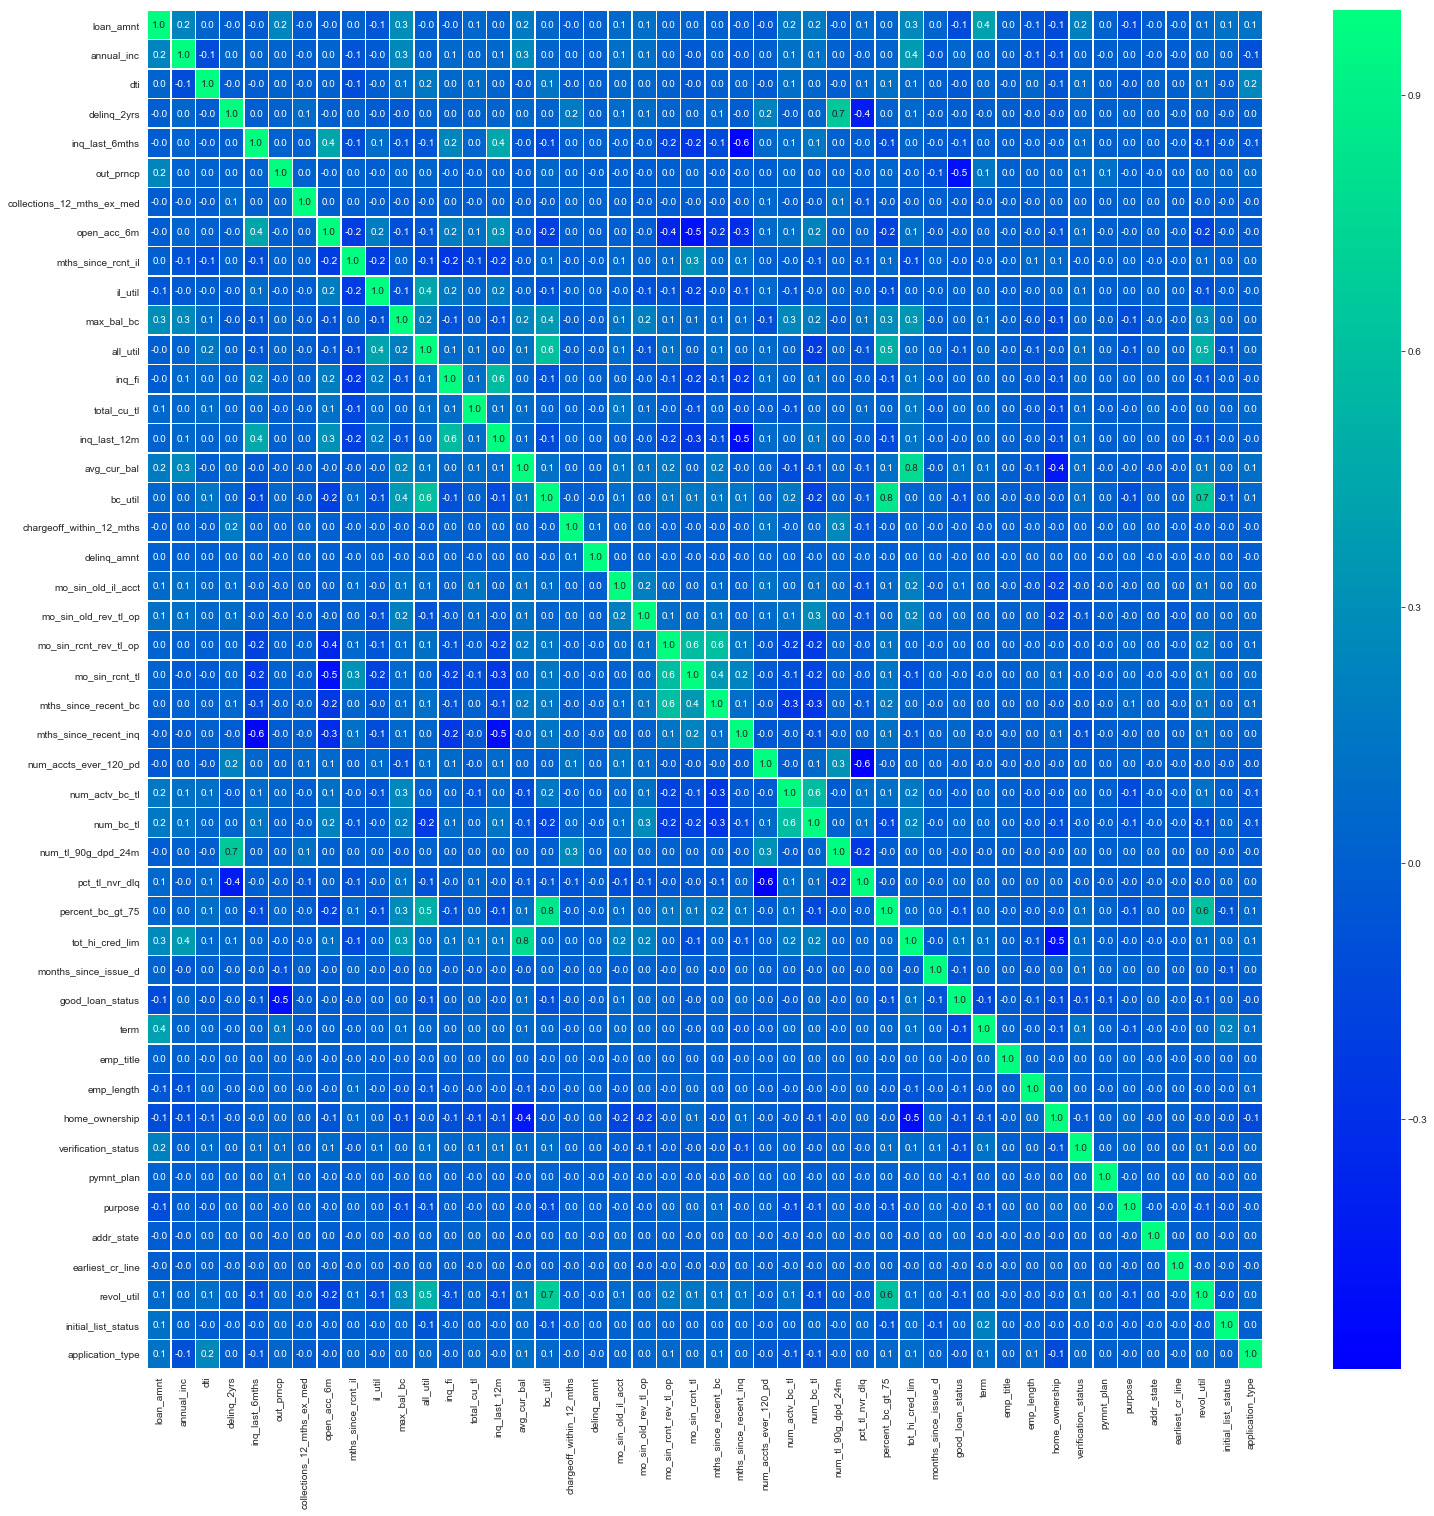

In [88]:
# Is there collinearity?
plt.figure(figsize=(25, 25))
sns.heatmap(data=loans.corr(), cmap="winter",
            fmt=".1f", linewidths=.5, annot=True)

'''f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)'''
plt.show()

In [89]:
loans.shape

(87923, 46)

In [90]:
loans.to_csv('lending_club_le.csv')

------